<a href="https://colab.research.google.com/github/Guest1537/AD-BP_mvp/blob/main/PUCrj_MPV2_PC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Análise de Dados e Boas Práticas

##### Pedro Caleffi Barbosa


## 1. Definição do problema

As alterações climáticas ocorrem sem se restringirem aos limites geográficos de países ou municípios (Espínola e Ribeiro, 2020). Em nível global, as nações têm promovido eventos, como as Conferências das Nações Unidas sobre Mudanças Climáticas (COPs), nas quais são debatidas medidas a serem adotadas coletivamente para mitigar os impactos da crise climática. Durante a COP 21, 195 países firmaram um compromisso internacional de limitar, até 2030, o aumento da temperatura global a menos de 2°C em comparação com as medições pré-Revolução Industrial.

Como citado pelo *Intergovernamental Pannel for Climate Change* (IPCC, 2023), o aumento da temperatura média global observado entre 1850 e 2019, entre +0,8°C e +1,3°C, com uma estimativa de 1,07°C, tem apresentado provável relação com a emissão de gases de efeito estufa realizada através de atividades humanas. Tendo em vista o compromisso tomado por 195 países na assinatura do Acordo de Paris (UNFCCC, 2015) durante a COP 21, a importância da mensuração das emissões realizadas é essencial para tomada de decisão objetiva. Para tal, foram coletados dados disponíveis para a emissão de gases de efeito estufa no Brasil segundo o Sistema de Estimativas de Emissões e Remoções de Gases de Efeito Estufa (SEEG) - acessível pelo link: https://seeg.eco.br/. Segundo o próprio Sistema:

> "O SEEG é a principal plataforma de monitoramento de emissões de gases de efeito estufa na América Latina e uma das maiores bases de dados nacionais de emissões do mundo. Ele fornece estimativas anuais de emissões de gases de efeito estufa no Brasil para todos os setores da economia, numa plataforma on-line de fácil acesso com dados que vêm desde 1970, além de análises e soluções para tomadores de decisão. Os dados do SEEG visam informar as políticas públicas de mitigação, bem como dar transparência à sociedade sobre as trajetórias de redução de emissões do país."


Em 26/11/2023 o site estava em atualização, não havendo possibilidade de download do arquivo utilizado, então ele foi disponibilizado de maneira pública em ambiente [Google Drive](https://docs.google.com/spreadsheets/d/1JwncYIOJd0m1cLgR1Fovdyt-vLN9KUbr/edit?usp=drive_link&ouid=117863055539952818718&rtpof=true&sd=true)


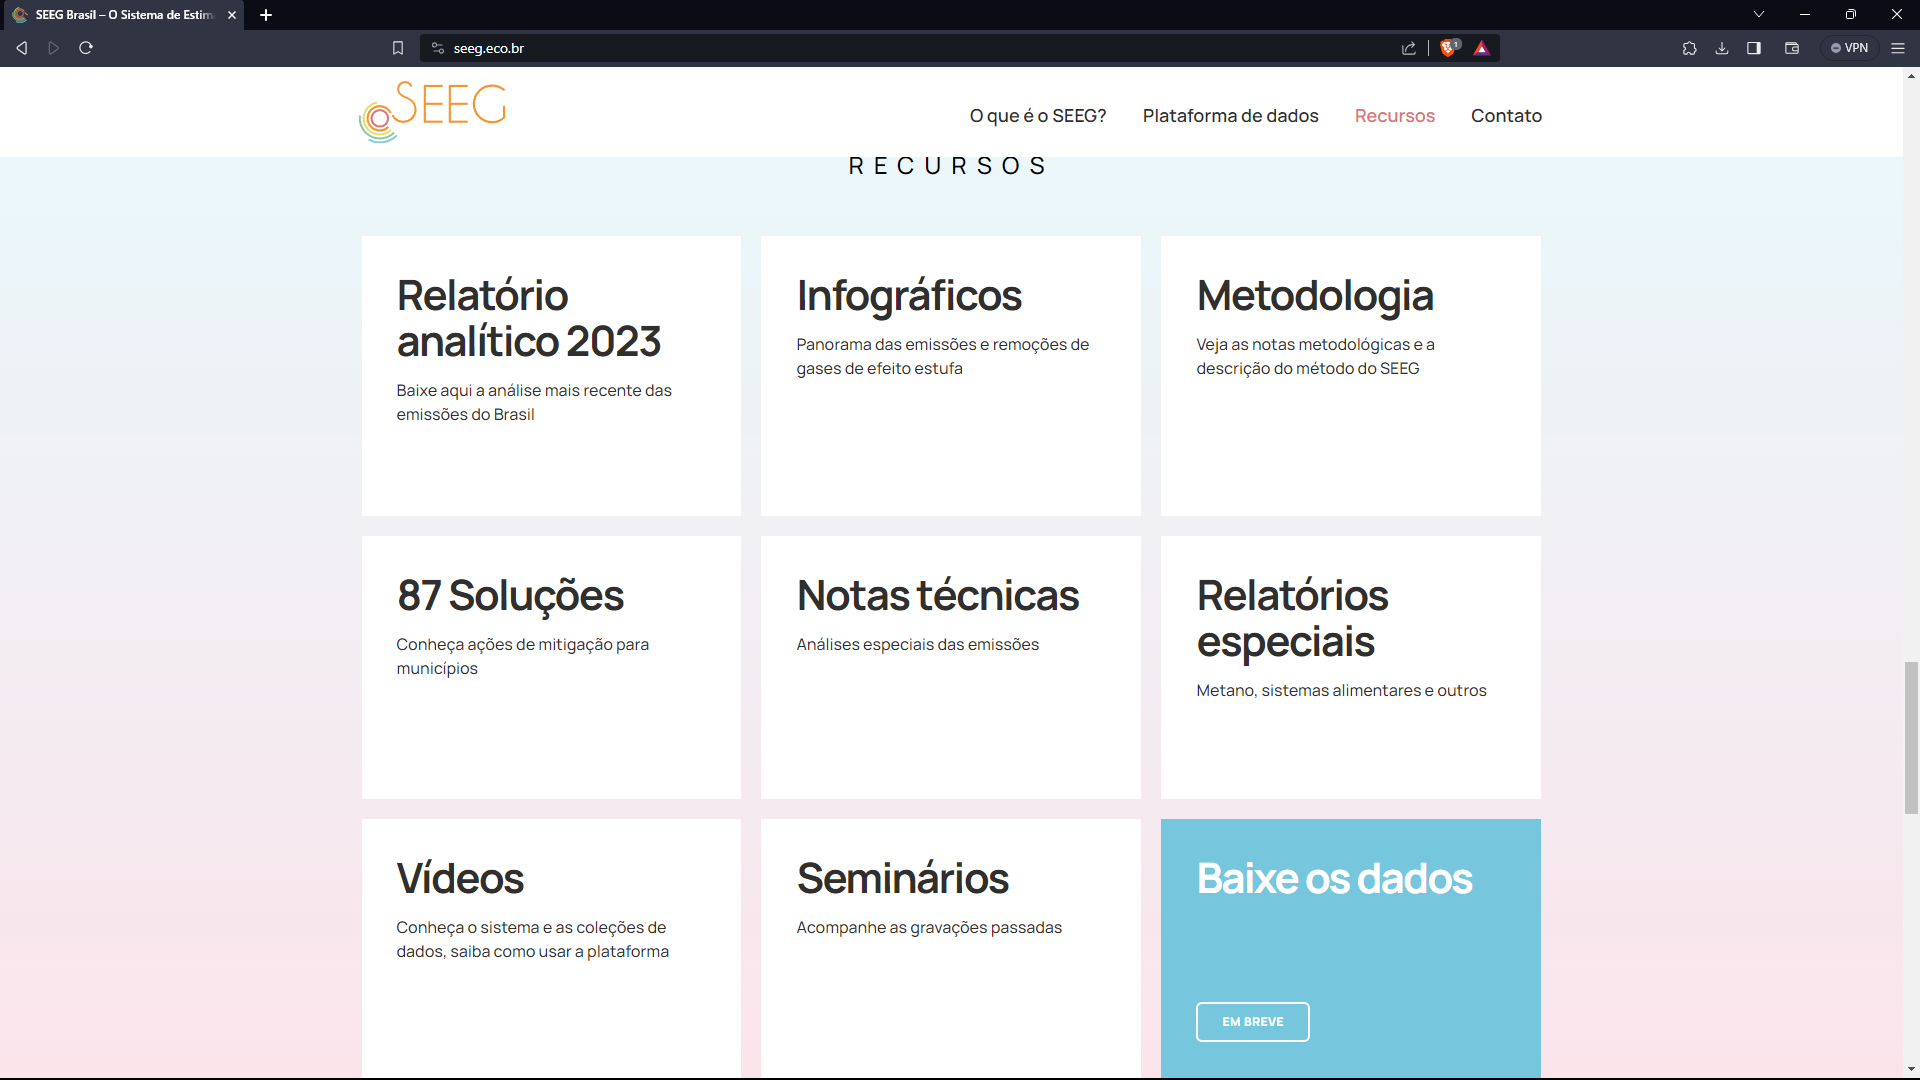

Dentro do arquivo utilizado (1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE), foi selecionada a aba "GEE Brasil", que inclui apresentação de emissão/remoção/bunker de GEEs de cada respectiva atividade dentro do território nacional e, visando adicionar ao conhecimento trazido em relatório apreseentado pelo [SEEG - Relatório 2023](https://seeg.eco.br/wp-content/uploads/2023/11/SEEG_gases_estufa_2023_v2-1.pdf), delimitam-se os objetivos:

### **Objetivos principais**
**- 1. Apresentar as principais atividades emissoras de GEEs de acordo com a série histórica encontrada**

**- 2. Calcular a representatividade das principais atividades perante o total de emissões de GEEs de cada ano e do período total e sua evolução**

### **Objetivos segundários**

**- a. Verificar a integridade e possíveis incongruências dos/nos dados**

**- b. (I) Identificar as principais atividades emissoras, (II) sua respectiva evolução no período e (III) realizar sua comparação visando observar qual atividade apresentou melhor evolução no período**


### **Informações sobre os atributos**

A base de dados utilizada quantifica a emissão, redução e reserva(*bunker*) de Gases de Efeito Estufa(GEEs) para os principais dados de atividade utilizados nos cálculo das estimativas de emissões do SEEG nos níveis nacional e regional, sendo apenas o nacional explorado neste trabalho.

1_Especificação do setor ao qual o GEE em questão faz relação. Dividido entre "Processos Industriais", "Energia", "Mudança de Uso da Terra e Florestas", "Agropecuparia" e "Resíduos". Tipo de atributo: *string*;

2-6_Especificação da atividade, dividida em 5 níveis a partir do atributo N1 ao qual o GEE faz relação. Glossário de atributos 1-6 conforme tabela apresentada abaixo, disponível na fonte dos dados ([SEEG](https://seeg.eco.br/)). Tipo de atributo: *string*;


7_Emissao_Remocao_Bunker - Classificação à  qual o GEE se refere entre "Emissão", "Remoção", "Emissão NCl", "Remoção NCl" e Bunker. Tipo de atributo: *string*;

8_GEE a que se faz referência. Tipo de atributo: *string*;

9_Nome da atividade econômica referência do GEE apresentado. Tipo de atributo: *string*;

10_Produto vinculado ao GEE. Tipo de atributo: *strinh*;

11-63_Valor de emissão/remoção/bunker relacionado ao GEE para o respectivo ano apresentado (1970 a 2021). Tido de atributo: *float64*

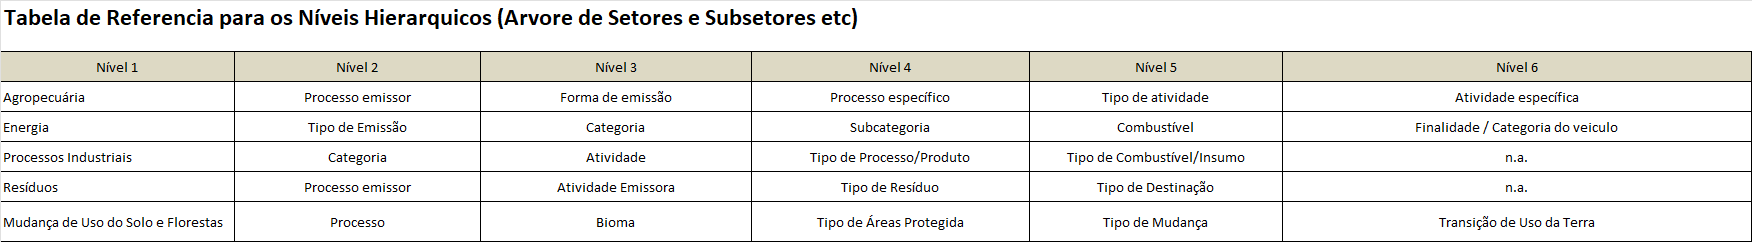

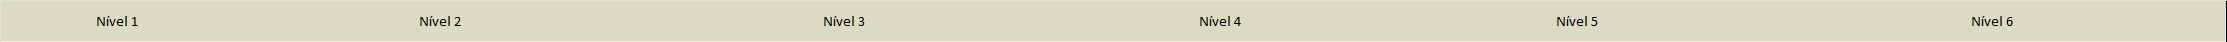
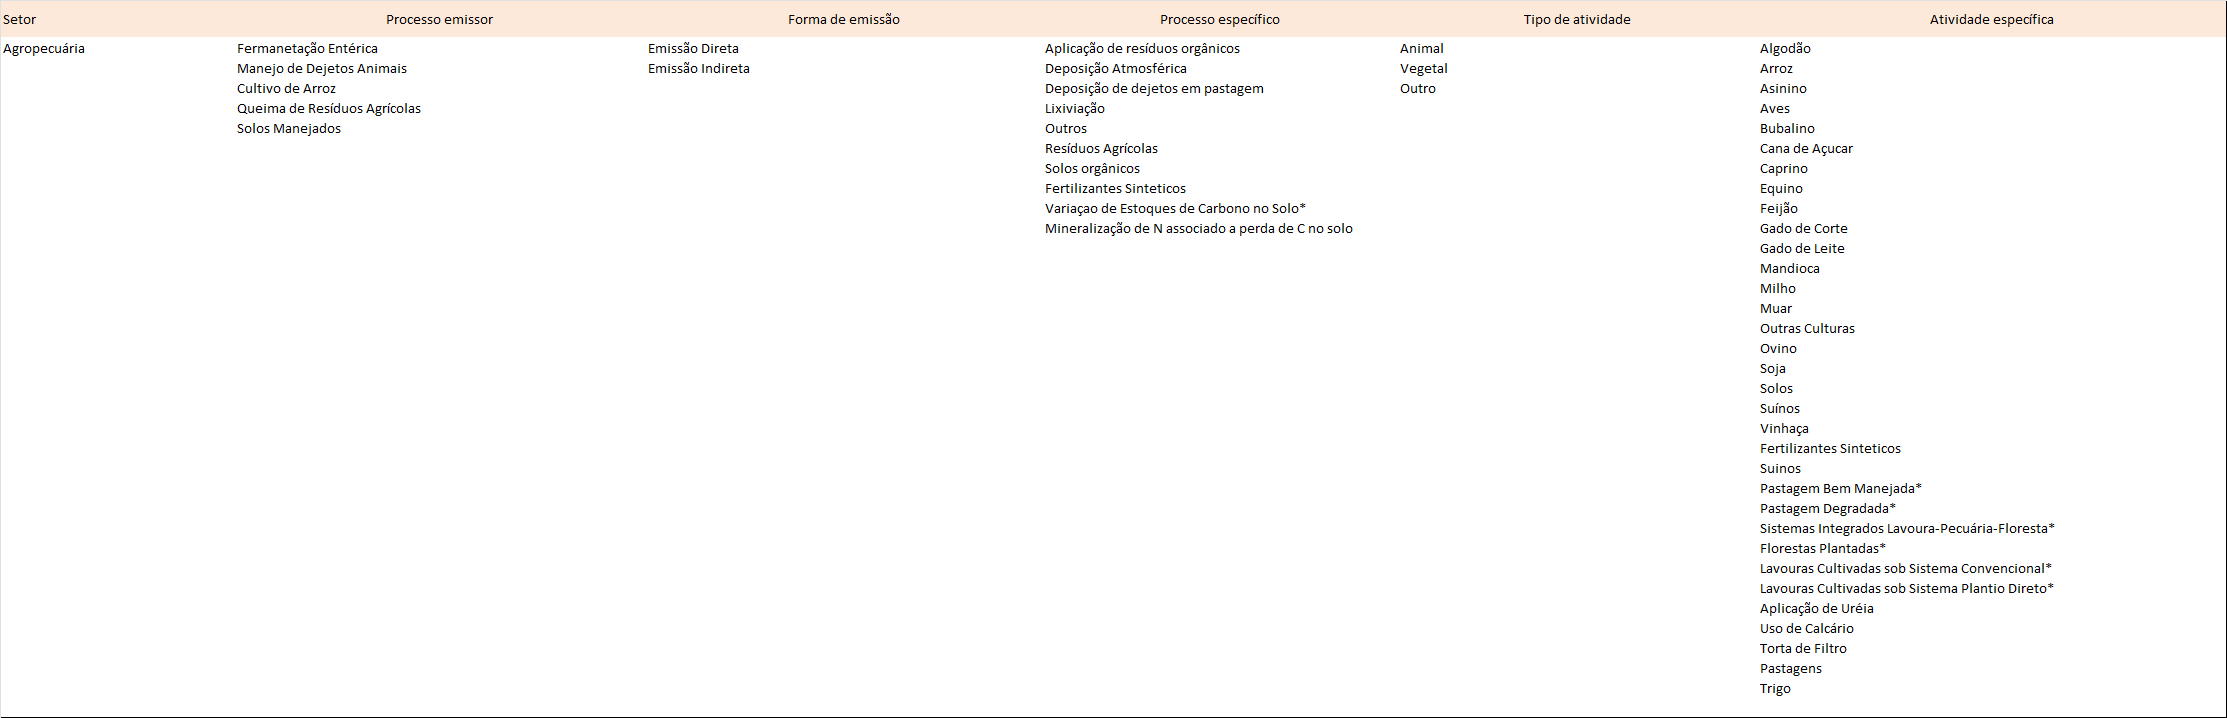

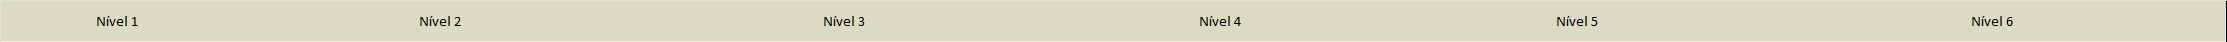
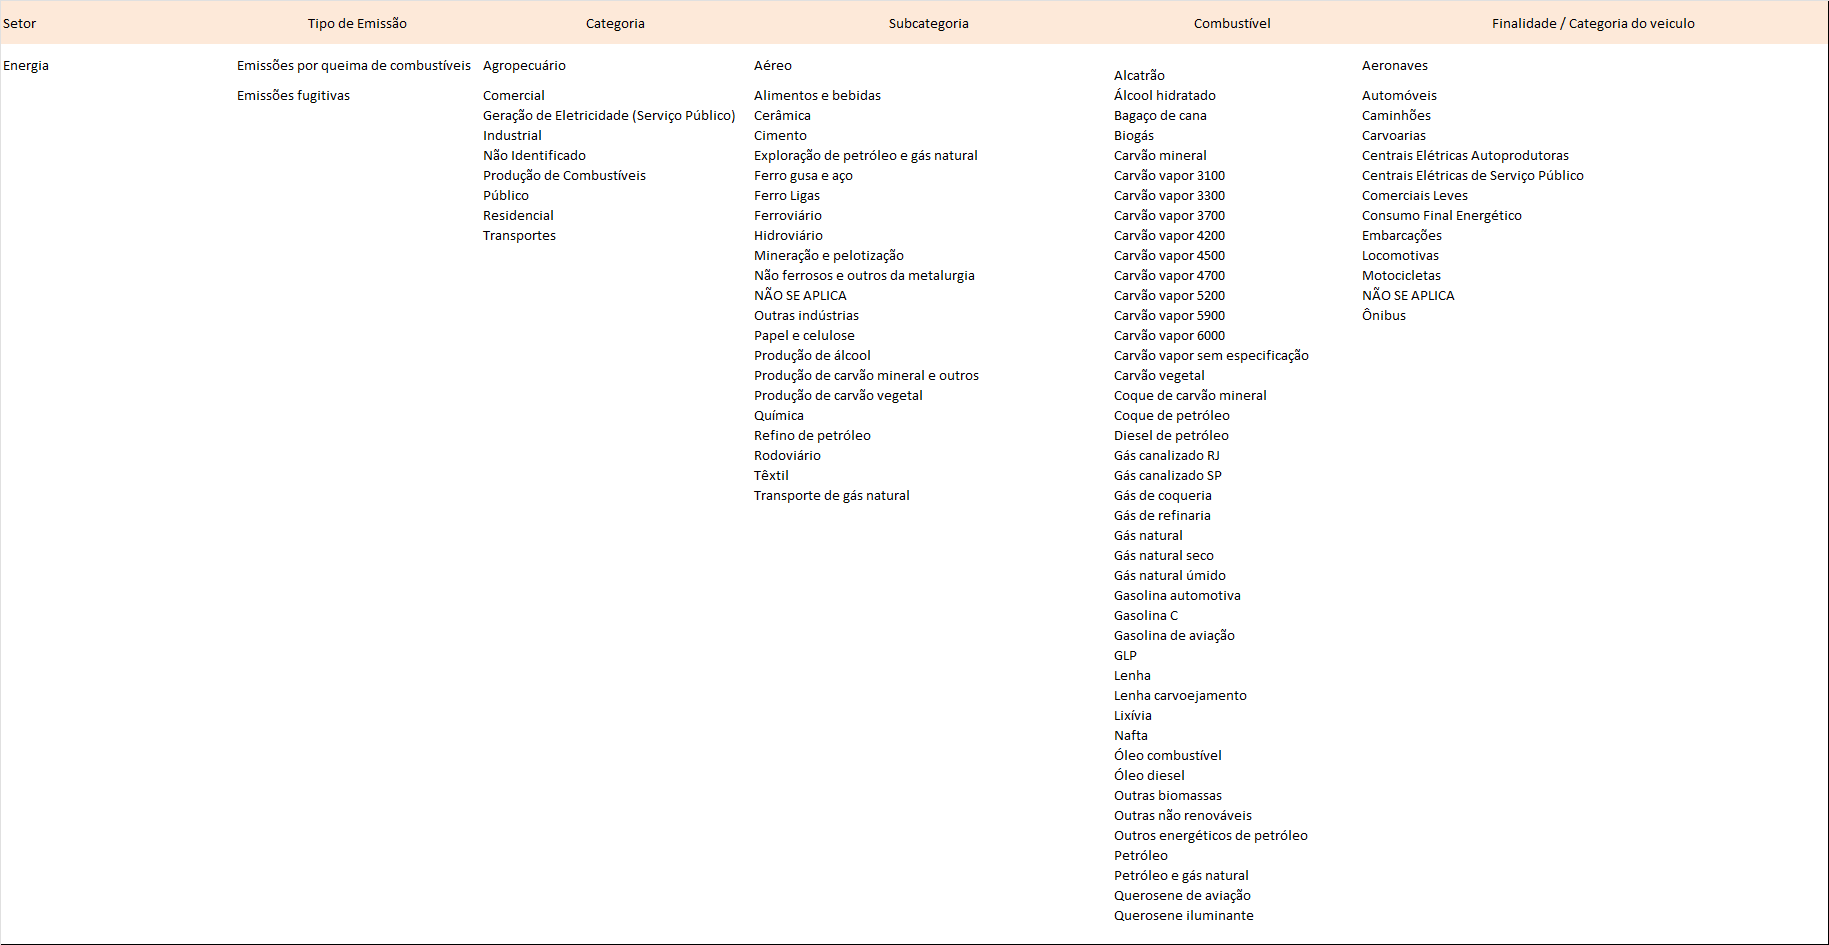

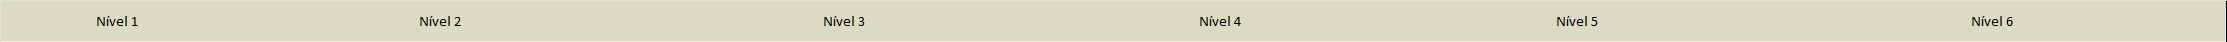
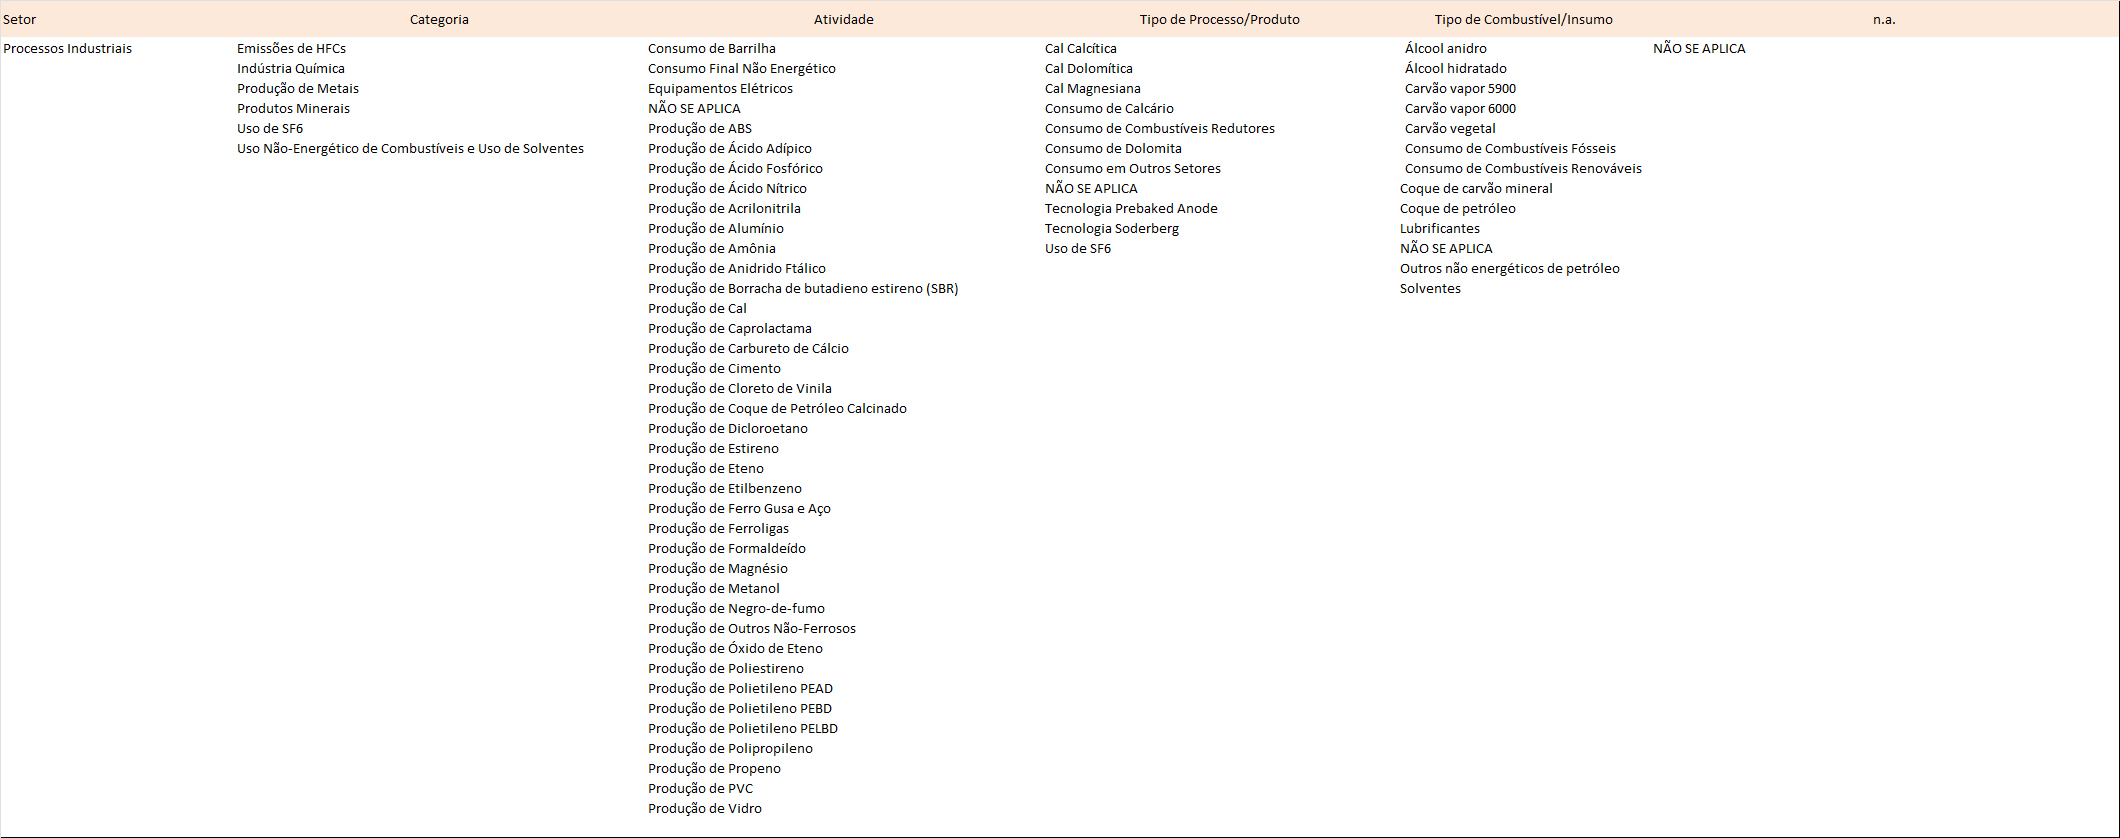

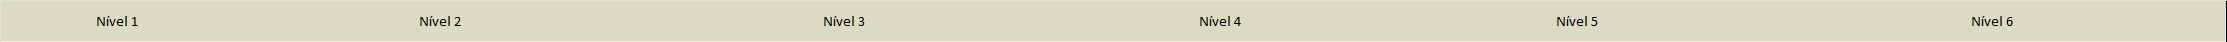
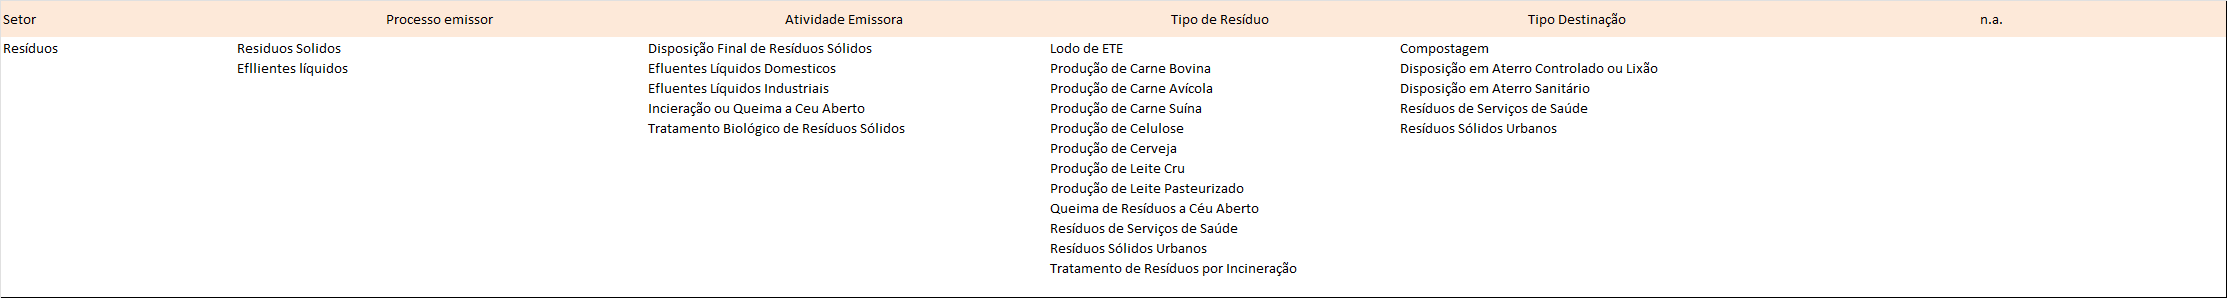

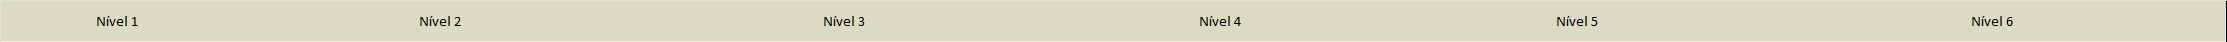
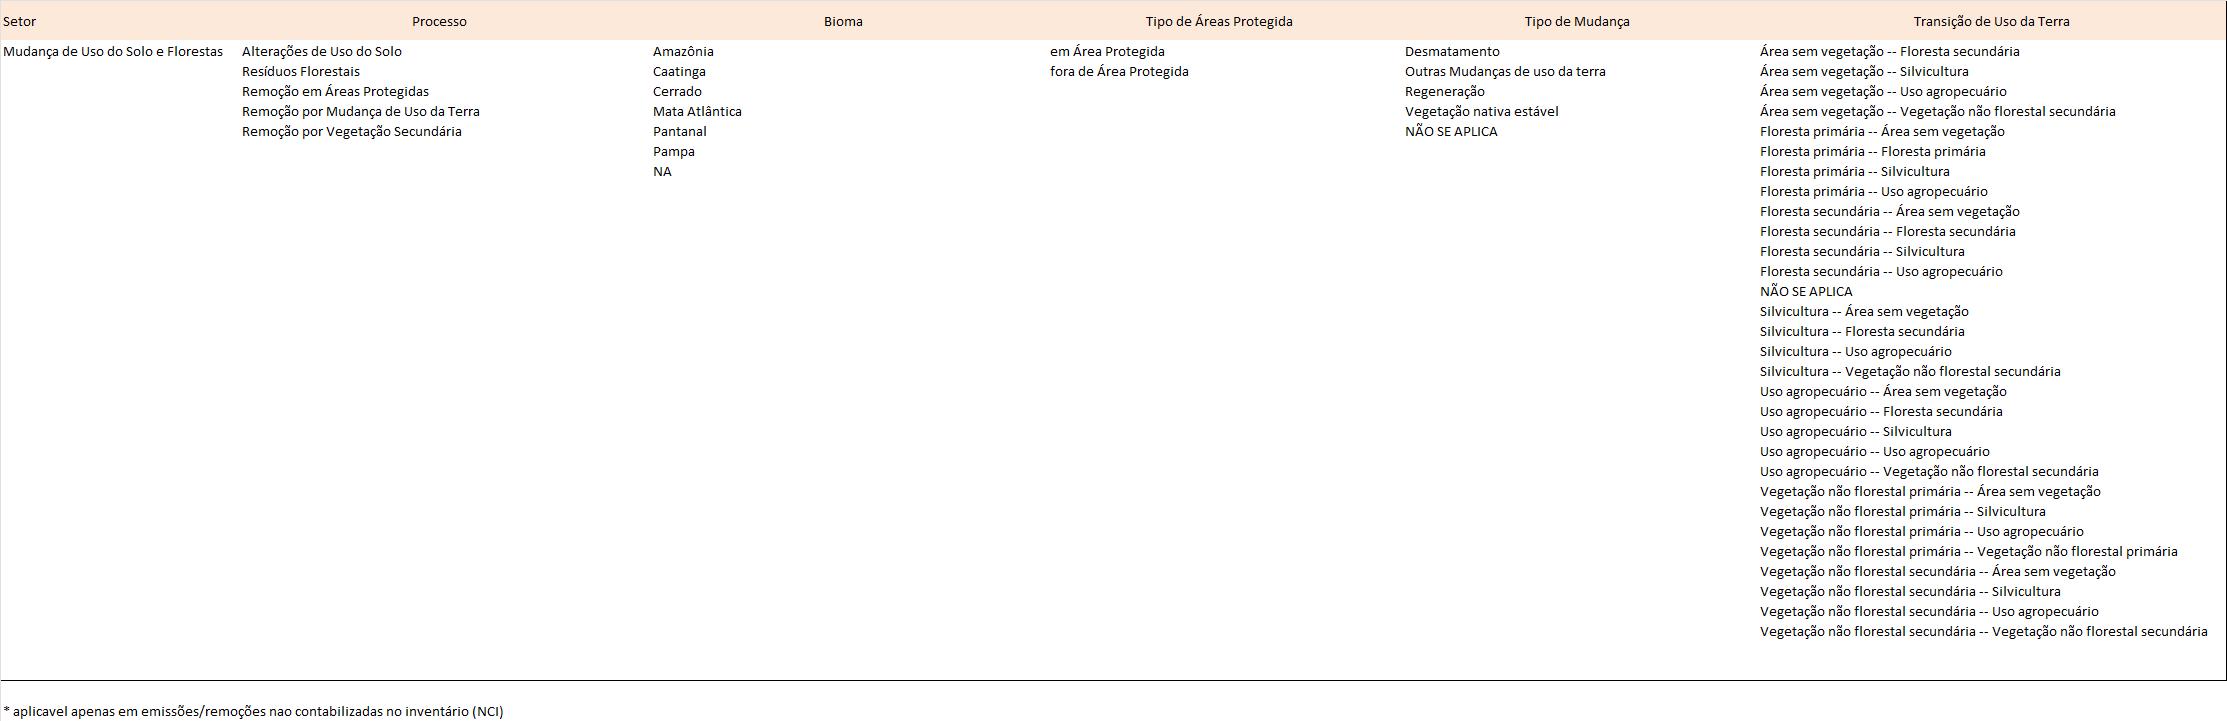


Abaixo, se importa as bibliotecas a serem utilizadas nos códigos:


##### Cd01 - Imports

In [1]:

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")


## Carga de dados


Dados presentes na tabela previamente mencionada foram normalizados, sendo  realizada em alguns pontos:

(I) retirando acendos de vogais (Exs.: ã, ê, í, õ, ú) e as substituindo pelas respectivas vogais a, e, i, o, u;

(II) substituindo "ç" por "c";

(III) substituindo " " (espaços) por "_";

(IV) adicionanado "Ano" aos valores representativos de cada ano com dados apresentados.

Após normalização, o arquivo .xlsx foi transformado em .csv e o dataset foi inserido em repositório do GitHub, informado abaixo.

##### Cd02 - Carrega Arquivo

In [3]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Guest1537/AD-BP_mvp/data/GEEBR_norm"

# Informa o cabeçalho das colunas
colunas = ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'EmissaoReducaoBunker', 'Gas', 'Território', 'AtividadeEconomica',
           'Produto', 'Ano1970', 'Ano1971', 'Ano1972', 'Ano1973', 'Ano1974', 'Ano1975', 'Ano1976', 'Ano1977', 'Ano1978', 'Ano1979',
           'Ano1980', 'Ano1981', 'Ano1982', 'Ano1983', 'Ano1984', 'Ano1985', 'Ano1986', 'Ano1987', 'Ano1988', 'Ano1989', 'Ano1990',
           'Ano1991', 'Ano1992', 'Ano1993', 'Ano1994', 'Ano1995', 'Ano1996', 'Ano1997', 'Ano1998', 'Ano1999', 'Ano2000', 'Ano2001',
           'Ano2002', 'Ano2003', 'Ano2004', 'Ano2005', 'Ano2006', 'Ano2007', 'Ano2008', 'Ano2009', 'Ano2010', 'Ano2011', 'Ano2012',
           'Ano2013', 'Ano2014', 'Ano2015', 'Ano2016', 'Ano2017', 'Ano2018', 'Ano2019', 'Ano2020', 'Ano2021']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

In [4]:
# Apresenta as 5 primeiras linhas do dataset importado

dataset.head()

N1                 N2                               N3  \
0  Processos_Industriais  Industria_Quimica               Producao_de_Amonia   
1  Processos_Industriais  Industria_Quimica  Producao_de_Carbureto_de_Calcio   
2  Processos_Industriais  Industria_Quimica              Producao_de_Metanol   
3  Processos_Industriais  Industria_Quimica                Producao_de_Eteno   
4  Processos_Industriais  Industria_Quimica    Producao_de_Cloreto_de_Vinila   

    N4   N5   N6 EmissaoReducaoBunker    Gas Território AtividadeEconomica  \
0  NaN  NaN  NaN              Emissao  CO2_t         BR          OUTRA_IND   
1  NaN  NaN  NaN              Emissao  CO2_t         BR          OUTRA_IND   
2  NaN  NaN  NaN              Emissao  CO2_t         BR          OUTRA_IND   
3  NaN  NaN  NaN              Emissao  CO2_t         BR          OUTRA_IND   
4  NaN  NaN  NaN              Emissao  CO2_t         BR          OUTRA_IND   

   ...       Ano2012       Ano2013       Ano2014       Ano2015       Ano2016  \
0  ...  1.758390e+06  1.804864e+06  1.985664e+06  1.985664e+06  1.985664e+06   
1  ...  4.200000e+04  4.200000e+04  4.200000e+04  4.200000e+04  4.200000e+04   
2  ...  4.462395e+04  3.078021e+04  2.142146e+04  2.142146e+04  2.142146e+04   
3  ...  5.518349e+03  5.868717e+03  5.633925e+03  5.633925e+03  5.633925e+03   
4  ...  2.058630e+05  2.058630e+05  2.058630e+05  2.058630e+05  2.058630e+05   

        Ano2017       Ano2018       Ano2019       Ano2020       Ano2021  
0  1.985664e+06  1.985664e+06  1.985664e+06  1.985664e+06  1.985664e+06  
1  4.200000e+04  4.200000e+04  4.200000e+04  4.200000e+04  4.200000e+04  
2  2.142146e+04  2.142146e+04  2.142146e+04  2.142146e+04  2.142146e+04  
3  5.633925e+03  5.633925e+03  5.633925e+03  5.633925e+03  5.633925e+03  
4  2.058630e+05  2.058630e+05  2.058630e+05  2.058630e+05  2.058630e+05  

[5 rows x 63 columns]

Percebe-se a existência de valores *null* nos atributos N4 a N6 e repetição de valor em diversos casos: Atributos N1, N2, EmissaoReducaoBunker, Gas, Território e Atividade econômica. Também se observa a repetição de valores ao longo de diferentes atributos, linhas 1 e 4, atributos Ano2012 a Ano2021, ponto também observado nas linhas 2 e 3 nos atributos Ano2014 a Ano2021.

## Análise de dados

### Estatístícas descritivas

##### Cd03 - Imprime detalhes do arquivo

In [5]:
# Apresenta dimensão do dataset (linhas X colunas)

print(dataset.shape)

(11283, 63)


In [6]:
# Apresenta informações das colunas do dataset

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11283 entries, 0 to 11282
Data columns (total 63 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   N1                    11283 non-null  object 
 1   N2                    11283 non-null  object 
 2   N3                    11224 non-null  object 
 3   N4                    9760 non-null   object 
 4   N5                    10856 non-null  object 
 5   N6                    10541 non-null  object 
 6   EmissaoReducaoBunker  11283 non-null  object 
 7   Gas                   11283 non-null  object 
 8   Território            11283 non-null  object 
 9   AtividadeEconomica    11055 non-null  object 
 10  Produto               3575 non-null   object 
 11  Ano1970               11283 non-null  float64
 12  Ano1971               11283 non-null  float64
 13  Ano1972               11283 non-null  float64
 14  Ano1973               11283 non-null  float64
 15  Ano1974            

In [7]:
# Mostra as 10 primeiras linhas do dataset

dataset.head(10)

N1                 N2                               N3  \
0  Processos_Industriais  Industria_Quimica               Producao_de_Amonia   
1  Processos_Industriais  Industria_Quimica  Producao_de_Carbureto_de_Calcio   
2  Processos_Industriais  Industria_Quimica              Producao_de_Metanol   
3  Processos_Industriais  Industria_Quimica                Producao_de_Eteno   
4  Processos_Industriais  Industria_Quimica    Producao_de_Cloreto_de_Vinila   
5  Processos_Industriais  Industria_Quimica       Producao_de_oxido_de_Eteno   
6  Processos_Industriais  Industria_Quimica        Producao_de_Acrilonitrila   
7  Processos_Industriais  Industria_Quimica          Producao_de_Negrodefumo   
8  Processos_Industriais  Industria_Quimica      Producao_de_acido_Fosforico   
9  Processos_Industriais  Industria_Quimica              Producao_de_Metanol   

    N4   N5   N6 EmissaoReducaoBunker    Gas Território AtividadeEconomica  \
0  NaN  NaN  NaN              Emissao  CO2_t         BR          OUTRA_IND   
1  NaN  NaN  NaN              Emissao  CO2_t         BR          OUTRA_IND   
2  NaN  NaN  NaN              Emissao  CO2_t         BR          OUTRA_IND   
3  NaN  NaN  NaN              Emissao  CO2_t         BR          OUTRA_IND   
4  NaN  NaN  NaN              Emissao  CO2_t         BR          OUTRA_IND   
5  NaN  NaN  NaN              Emissao  CO2_t         BR          OUTRA_IND   
6  NaN  NaN  NaN              Emissao  CO2_t         BR          OUTRA_IND   
7  NaN  NaN  NaN              Emissao  CO2_t         BR          OUTRA_IND   
8  NaN  NaN  NaN              Emissao  CO2_t         BR          OUTRA_IND   
9  NaN  NaN  NaN              Emissao  CH4_t         BR          OUTRA_IND   

   ...       Ano2012       Ano2013       Ano2014       Ano2015       Ano2016  \
0  ...  1.758390e+06  1.804864e+06  1.985664e+06  1.985664e+06  1.985664e+06   
1  ...  4.200000e+04  4.200000e+04  4.200000e+04  4.200000e+04  4.200000e+04   
2  ...  4.462395e+04  3.078021e+04  2.142146e+04  2.142146e+04  2.142146e+04   
3  ...  5.518349e+03  5.868717e+03  5.633925e+03  5.633925e+03  5.633925e+03   
4  ...  2.058630e+05  2.058630e+05  2.058630e+05  2.058630e+05  2.058630e+05   
5  ...  1.460956e+05  1.460956e+05  1.460956e+05  1.460956e+05  1.460956e+05   
6  ...  2.197148e+04  2.197148e+04  2.197148e+04  2.197148e+04  2.197148e+04   
7  ...  6.472971e+05  6.472971e+05  6.472971e+05  6.472971e+05  6.472971e+05   
8  ...  9.039479e+04  9.039479e+04  9.039479e+04  9.039479e+04  9.039479e+04   
9  ...  3.844011e+02  2.651479e+02  1.845295e+02  1.845295e+02  1.845295e+02   

        Ano2017       Ano2018       Ano2019       Ano2020       Ano2021  
0  1.985664e+06  1.985664e+06  1.985664e+06  1.985664e+06  1.985664e+06  
1  4.200000e+04  4.200000e+04  4.200000e+04  4.200000e+04  4.200000e+04  
2  2.142146e+04  2.142146e+04  2.142146e+04  2.142146e+04  2.142146e+04  
3  5.633925e+03  5.633925e+03  5.633925e+03  5.633925e+03  5.633925e+03  
4  2.058630e+05  2.058630e+05  2.058630e+05  2.058630e+05  2.058630e+05  
5  1.460956e+05  1.460956e+05  1.460956e+05  1.460956e+05  1.460956e+05  
6  2.197148e+04  2.197148e+04  2.197148e+04  2.197148e+04  2.197148e+04  
7  6.472971e+05  6.472971e+05  6.472971e+05  6.472971e+05  6.472971e+05  
8  9.039479e+04  9.039479e+04  9.039479e+04  9.039479e+04  9.039479e+04  
9  1.845295e+02  1.845295e+02  1.845295e+02  1.845295e+02  1.845295e+02  

[10 rows x 63 columns]

In [8]:
# Mostra as 10 últimas linhas do dataset

dataset.tail(10)

N1  \
11273  Mudanca_de_Uso_da_Terra_e_Floresta   
11274  Mudanca_de_Uso_da_Terra_e_Floresta   
11275  Mudanca_de_Uso_da_Terra_e_Floresta   
11276  Mudanca_de_Uso_da_Terra_e_Floresta   
11277  Mudanca_de_Uso_da_Terra_e_Floresta   
11278  Mudanca_de_Uso_da_Terra_e_Floresta   
11279  Mudanca_de_Uso_da_Terra_e_Floresta   
11280  Mudanca_de_Uso_da_Terra_e_Floresta   
11281  Mudanca_de_Uso_da_Terra_e_Floresta   
11282  Mudanca_de_Uso_da_Terra_e_Floresta   

                                            N2        N3   N4   N5   N6  \
11273  Queimadas_Nao_Associadas_a_Desmatamento  Pantanal  NaN  NaN  NaN   
11274  Queimadas_Nao_Associadas_a_Desmatamento  Pantanal  NaN  NaN  NaN   
11275  Queimadas_Nao_Associadas_a_Desmatamento  Pantanal  NaN  NaN  NaN   
11276  Queimadas_Nao_Associadas_a_Desmatamento  Pantanal  NaN  NaN  NaN   
11277  Queimadas_Nao_Associadas_a_Desmatamento  Pantanal  NaN  NaN  NaN   
11278  Queimadas_Nao_Associadas_a_Desmatamento  Pantanal  NaN  NaN  NaN   
11279  Queimadas_Nao_Associadas_a_Desmatamento  Pantanal  NaN  NaN  NaN   
11280  Queimadas_Nao_Associadas_a_Desmatamento  Pantanal  NaN  NaN  NaN   
11281  Queimadas_Nao_Associadas_a_Desmatamento  Pantanal  NaN  NaN  NaN   
11282  Queimadas_Nao_Associadas_a_Desmatamento  Pantanal  NaN  NaN  NaN   

      EmissaoReducaoBunker            Gas Território AtividadeEconomica  ...  \
11273          Emissao_NCI          CO2_t         BR                NaN  ...   
11274          Emissao_NCI          N2O_t         BR                NaN  ...   
11275          Emissao_NCI  CO2e_t_GTPAR2         BR                NaN  ...   
11276          Emissao_NCI  CO2e_t_GTPAR4         BR                NaN  ...   
11277          Emissao_NCI  CO2e_t_GTPAR5         BR                NaN  ...   
11278          Emissao_NCI  CO2e_t_GTPAR6         BR                NaN  ...   
11279          Emissao_NCI  CO2e_t_GWPAR2         BR                NaN  ...   
11280          Emissao_NCI  CO2e_t_GWPAR4         BR                NaN  ...   
11281          Emissao_NCI  CO2e_t_GWPAR5         BR                NaN  ...   
11282          Emissao_NCI  CO2e_t_GWPAR6         BR                NaN  ...   

         Ano2012    Ano2013   Ano2014    Ano2015    Ano2016    Ano2017  \
11273  2556149.0  1036197.0  805766.0   928245.0  1456263.0  1393246.0   
11274      575.0      187.0     166.0      261.0      550.0      544.0   
11275  2755909.0  1098672.0  859981.0  1014325.0  1637303.0  1574446.0   
11276  2755909.0  1098672.0  859981.0  1014325.0  1637303.0  1574446.0   
11277  2726307.0  1089543.0  852126.0  1001807.0  1610995.0  1547998.0   
11278  2731963.4  1091033.9  853275.3  1003731.4  1615000.6  1552258.8   
11279  2921341.0  1144504.0  896685.0  1074717.0  1763431.0  1706030.0   
11280  2950049.0  1151848.0  902209.0  1084073.0  1782863.0  1726958.0   
11281  2957780.0  1152868.0  902368.0  1084826.0  1784237.0  1729598.0   
11282  2953478.0  1151967.0  901817.0  1083792.0  1782129.0  1727086.0   

        Ano2018    Ano2019     Ano2020  Ano2021  
11273  178342.0  2507448.0   8894094.0      0.0  
11274     130.0     1003.0      2431.0      0.0  
11275  221527.0  2846503.0   9761894.0      0.0  
11276  221527.0  2846503.0   9761894.0      0.0  
11277  215230.0  2796746.0   9632092.0      0.0  
11278  216231.9  2805297.3   9659261.2      0.0  
11279  252599.0  3105007.0  10535710.0      0.0  
11280  257507.0  3147567.0  10675682.0      0.0  
11281  258068.0  3155415.0  10722317.0      0.0  
11282  257491.0  3149790.0  10699479.0      0.0  

[10 rows x 63 columns]

Observa-se a repetição de registros ao longo dos atributos 'Ano2012' a 'Ano2021' para as linhas 11275 e 11276, mesmo representando Gases diferentes (CO2e_t_GTPAR2 e CO2e_t_GTPAR4).

In [9]:
# Mostra os tipos de dado de cada atributo

dataset.dtypes

N1          object
N2          object
N3          object
N4          object
N5          object
            ...   
Ano2017    float64
Ano2018    float64
Ano2019    float64
Ano2020    float64
Ano2021    float64
Length: 63, dtype: object

In [10]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)

dataset.describe()

Ano1970       Ano1971       Ano1972       Ano1973       Ano1974  \
count  1.128300e+04  1.128300e+04  1.128300e+04  1.128300e+04  1.128300e+04   
mean   1.868309e+05  1.995443e+05  2.124316e+05  2.307784e+05  2.454283e+05   
std    2.310704e+06  2.419893e+06  2.536581e+06  2.673686e+06  2.785652e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.983347e+00  5.028113e+00  6.385342e+00  4.638643e+00  1.314064e+01   
max    1.202795e+08  1.255897e+08  1.309034e+08  1.362156e+08  1.416780e+08   

            Ano1975       Ano1976       Ano1977       Ano1978       Ano1979  \
count  1.128300e+04  1.128300e+04  1.128300e+04  1.128300e+04  1.128300e+04   
mean   2.637392e+05  2.827052e+05  2.901723e+05  3.023778e+05  3.175978e+05   
std    3.053491e+06  3.208256e+06  3.179036e+06  3.199433e+06  3.268646e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.008826e+01  6.167894e+01  1.708119e+02  2.751132e+02  7.069716e+02   
max    1.562657e+08  1.636468e+08  1.608285e+08  1.601617e+08  1.626115e+08   

       ...       Ano2012       Ano2013       Ano2014       Ano2015  \
count  ...  1.128300e+04  1.128300e+04  1.128300e+04  1.128300e+04   
mean   ...  2.293325e+06  2.384436e+06  2.376460e+06  2.486445e+06   
std    ...  1.690044e+07  1.771791e+07  1.746131e+07  1.896919e+07   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    ...  2.960361e+03  3.312803e+03  2.973000e+03  2.330061e+03   
75%    ...  2.054772e+05  2.401870e+05  2.189641e+05  2.074570e+05   
max    ...  3.297708e+08  3.429843e+08  3.337335e+08  4.061886e+08   

            Ano2016       Ano2017       Ano2018       Ano2019       Ano2020  \
count  1.128300e+04  1.128300e+04  1.128300e+04  1.128300e+04  1.128300e+04   
mean   2.486204e+06  2.410698e+06  2.419037e+06  2.588939e+06  2.608458e+06   
std    2.026330e+07  1.851839e+07  1.948714e+07  2.152992e+07  2.206013e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    2.516356e+03  2.813331e+03  2.707435e+03  2.531310e+03  2.375000e+03   
75%    1.955450e+05  2.078123e+05  2.062174e+05  2.060885e+05  1.812690e+05   
max    4.735285e+08  3.659409e+08  4.224688e+08  5.221713e+08  5.412799e+08   

            Ano2021  
count  1.128300e+04  
mean   2.739426e+06  
std    2.169533e+07  
min    0.000000e+00  
25%    0.000000e+00  
50%    2.084988e+03  
75%    1.894900e+05  
max    4.901376e+08  

[8 rows x 52 columns]

Observa-se a grande ocorrência de valores '0' no primeiro quartil de todos os atributos 'Ano'

In [11]:

# Estabelecendo um dataset para uso
std_dev = dataset.describe().std()

# Redefinindo a opção display.max_rows e imprimindo estatísticas descritivas do dataset
pd.set_option('display.max_rows', 70)
pd.set_option('display.max_columns', 70)

print(dataset.describe(percentiles=[.5]))

# Resetando a opção display.max_rows
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)


            Ano1970       Ano1971       Ano1972       Ano1973       Ano1974  \
count  1.128300e+04  1.128300e+04  1.128300e+04  1.128300e+04  1.128300e+04   
mean   1.868309e+05  1.995443e+05  2.124316e+05  2.307784e+05  2.454283e+05   
std    2.310704e+06  2.419893e+06  2.536581e+06  2.673686e+06  2.785652e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.202795e+08  1.255897e+08  1.309034e+08  1.362156e+08  1.416780e+08   

            Ano1975       Ano1976       Ano1977       Ano1978       Ano1979  \
count  1.128300e+04  1.128300e+04  1.128300e+04  1.128300e+04  1.128300e+04   
mean   2.637392e+05  2.827052e+05  2.901723e+05  3.023778e+05  3.175978e+05   
std    3.053491e+06  3.208256e+06  3.179036e+06  3.199433e+06  3.268646e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.

Observa-se que a partir de 1990 o valor representante do 2º quartil deixa de ser '0'

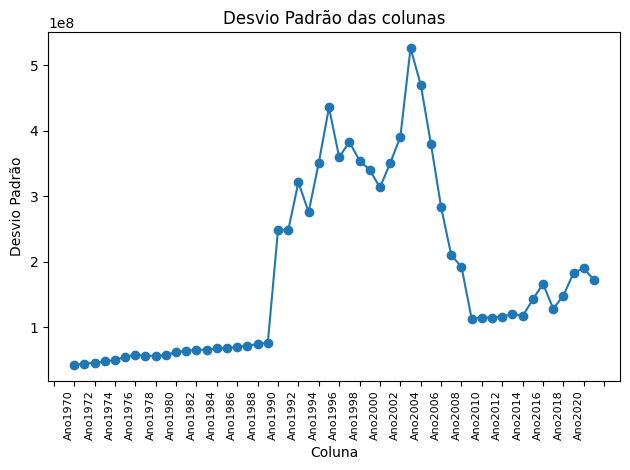

In [12]:
# Imprime-se o desvio padrão calculado em formato de gráfico de linha para melhor visualização e análise
plt.plot(std_dev.index, std_dev.values, marker='o', linestyle='-')
plt.title('Desvio Padrão das colunas')
plt.xlabel('Coluna')
plt.ylabel('Desvio Padrão')

# Plota o gráfico
plt.xticks(np.arange(len(std_dev.index)), std_dev.index, rotation=90, ha='right', fontsize=8)

# Adiciona espaço entre os ticks do eixo x
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))

# Adiciona espaço no plot visando a não omissão de rótulos
plt.tight_layout()

# Imprime o gráfico
plt.show()



Observa-se claramente a ocorrência de três momentos diferentes no desvio padrão observado nos valores totais para as emissões de GEEs entre 1970 e 2021, a ser explorado posteriormente neste trabalho.

In [13]:
# Conta cada aparição única de dados diferentes em 'AtividadeEconomica'
ContaAE = dataset.groupby('AtividadeEconomica').size()

# Calcula o total de aparições dos dados
total_count = ContaAE.sum()

# Apresenta a representatividade para cada 'AtividadeEconomica'
print("\nContagem e representatividade por Atividade Econômica:")
for atividade, count in ContaAE.items():
    percentage = (count / total_count) * 100
    print(f"{atividade}")
    print(f"  {count} - {percentage:.2f}%")

# Apresenta o total de aparições de 'AtividadeEconomica'
print("\nTotal:", total_count)


Contagem e representatividade por Atividade Econômica:
AGR
  339 - 3.07%
AGROPEC
  3067 - 27.74%
CIM
  368 - 3.33%
COM
  151 - 1.37%
ENE_ELET
  1999 - 18.08%
HFC
  14 - 0.13%
MET
  830 - 7.51%
OUTRA_IND
  2392 - 21.64%
PEC
  526 - 4.76%
PROD_COMB
  584 - 5.28%
PUB
  165 - 1.49%
RES
  96 - 0.87%
SANEAMENTO
  86 - 0.78%
TRAN_CARGA
  241 - 2.18%
TRAN_PASS
  197 - 1.78%

Total: 11055


Observa-se como já foi idenficada incongruência nos dados, tendo em vista que o total de linhas do dataset é de 11283 e o total de aparições de "AtividadeEconomica" foi apenas de 11055 e concluindo que o atributo possuí 223 registros *null*

### Visualizações unimodais


##### Cd04 - Seleciona os 10 maiores valores por ano

Devido a quantidade de dados envolvidos, se seleciona apenas os dez maiores registros de emissões de cada ano para análises iniciais.

O código abaixo remove duplicatas encontradas devido à multiplia aparição de valores 0 e visando mitigar quais redundância dos dados.

In [14]:
# Estabelece-se uma variável com nome da lista das colunas
col = list(dataset.columns)

# Seleciona apenas as colunas correspondentes aos anos
colunas_anos = col[11:]

# Cria um novo DataFrame para armazenar os 10 maiores valores únicos para cada coluna
top_10_por_coluna = pd.DataFrame()

# Itera sobre cada coluna correspondente aos anos
for col in colunas_anos:
    # Seleciona e apresenta os 10 maiores valores para a coluna atual, removendo duplicatas
    top_10_valores = dataset.drop_duplicates(subset=col).nlargest(10, col)[[col]]

    # Exibe os 10 maiores valores únicos para cada ano
    print(top_10_valores)

    # Adiciona a coluna ao novo DataFrame
    top_10_por_coluna = pd.concat([top_10_por_coluna, top_10_valores], axis=1)

# Exibe o resultado final, contendo valores nulos que preenchem células vazias nos top10 para determinado ano
print(top_10_por_coluna)

           Ano1970
505   1.202795e+08
506   1.159838e+08
504   1.073924e+08
503   9.020964e+07
514   2.391833e+07
515   2.306411e+07
2758  2.275304e+07
2759  2.206676e+07
499   2.147849e+07
513   2.135565e+07
           Ano1971
505   1.255897e+08
506   1.211044e+08
504   1.121337e+08
503   9.419229e+07
514   2.500407e+07
515   2.411107e+07
2758  2.273862e+07
499   2.242674e+07
513   2.232507e+07
2759  2.205278e+07
           Ano1972
505   1.309034e+08
506   1.262282e+08
504   1.168780e+08
503   9.817751e+07
514   2.608649e+07
515   2.515483e+07
499   2.337560e+07
513   2.329151e+07
7814  2.279553e+07
7812  2.272298e+07
           Ano1973
505   1.362156e+08
506   1.313507e+08
504   1.216211e+08
503   1.021617e+08
514   2.716918e+07
7814  2.692967e+07
7812  2.684397e+07
7811  2.672449e+07
7810  2.654905e+07
515   2.619885e+07
           Ano1974
505   1.416780e+08
506   1.366180e+08
504   1.264982e+08
503   1.062585e+08
514   2.823962e+07
7814  2.809598e+07
7812  2.800657e+07
7811  2.7881

##### Cd05 - Density plot 1 - Todos dados

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='D

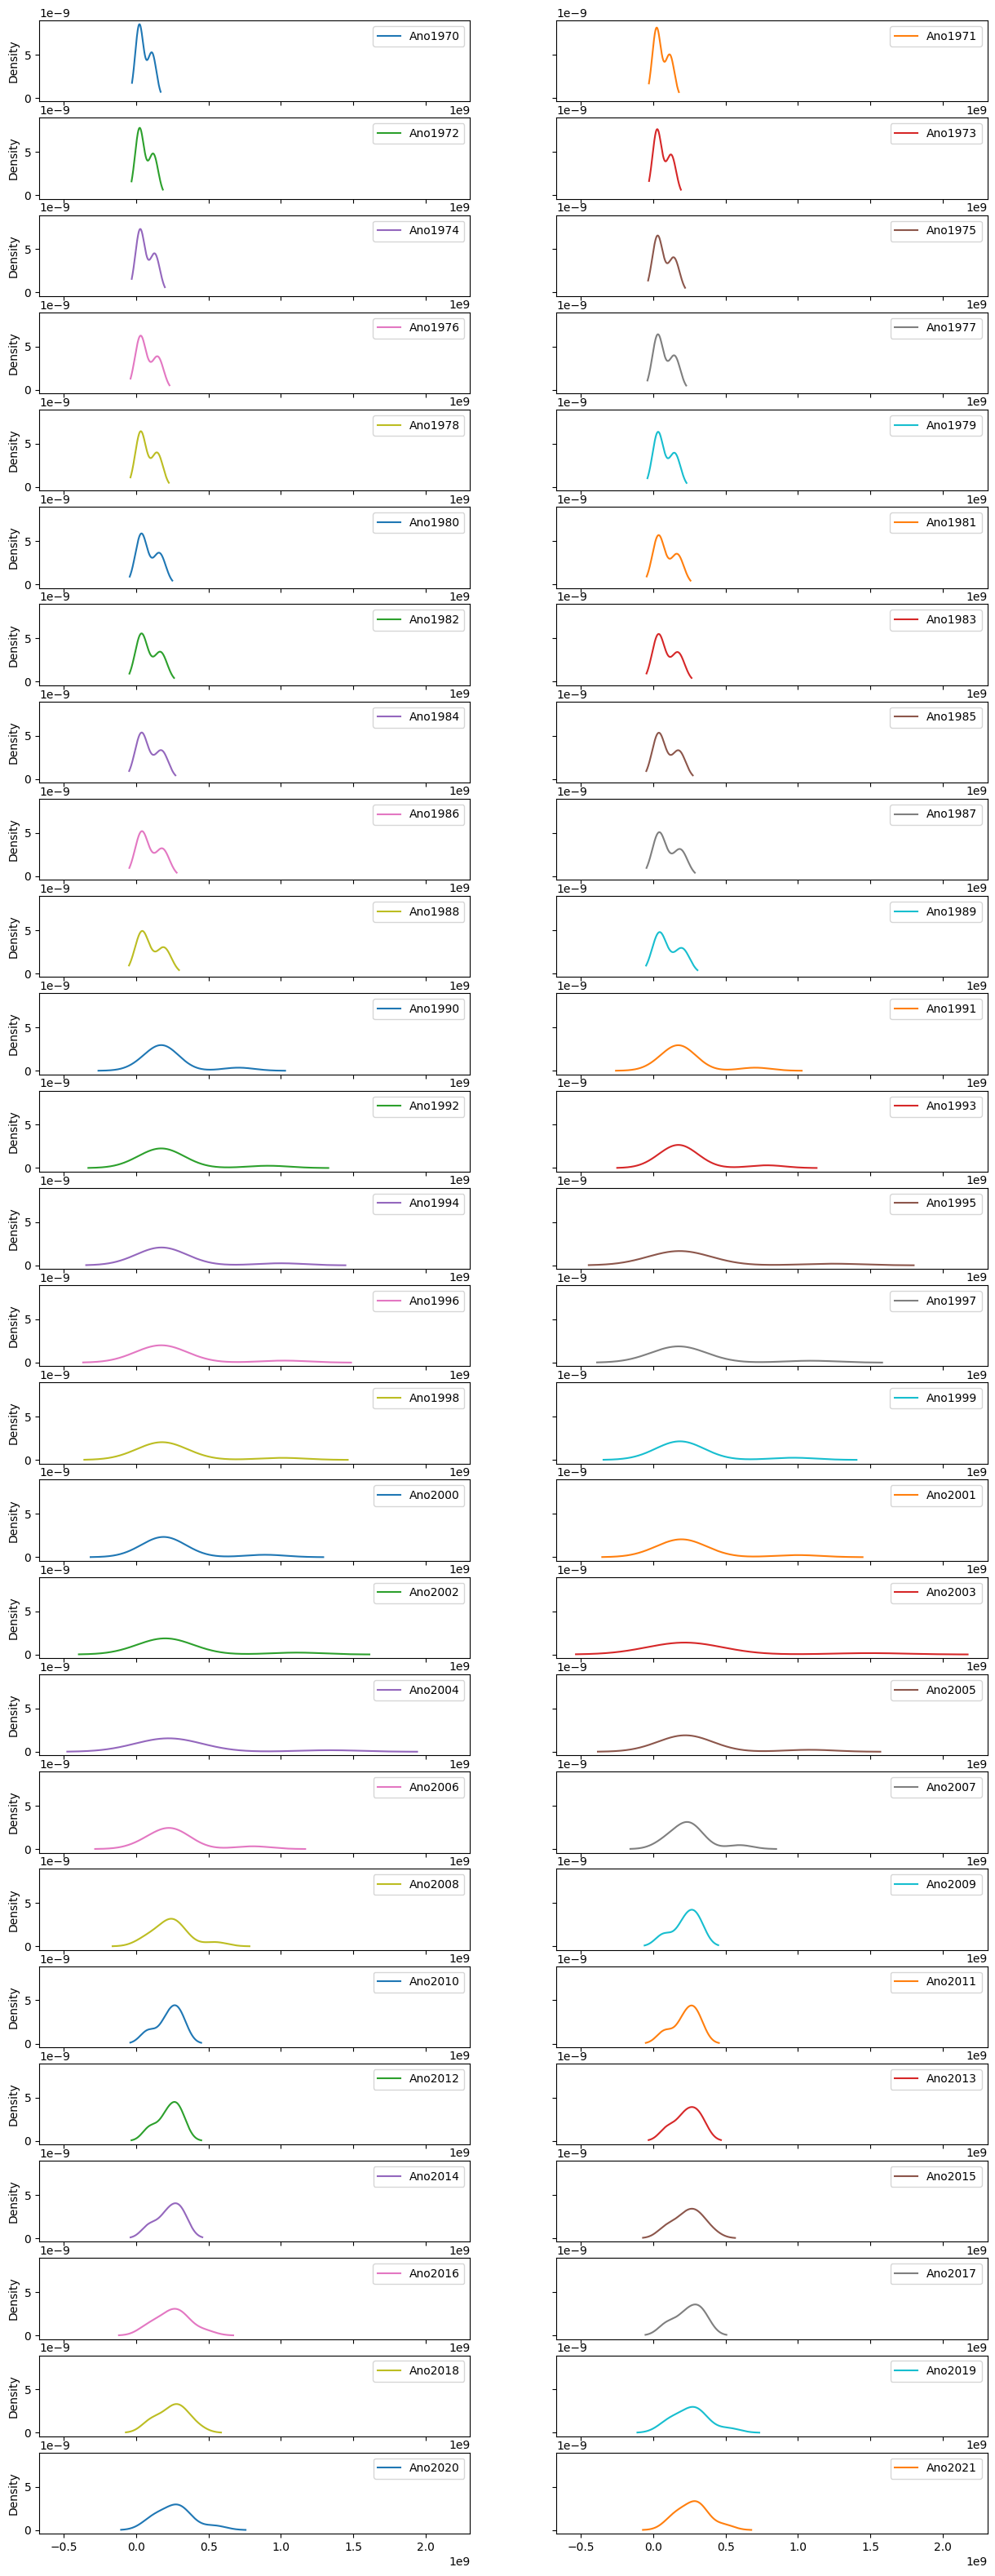

In [15]:
# Density Plot 1 - registros de dados em cada ano (Todos os dados)
top_10_por_coluna.plot(kind = 'density', subplots = True, layout = (26,2), sharex = True, sharey = True, figsize = (15,40))

Verifica-se o crescimento da distribuição de dados em três etapas: entre (I) 1970 e 1989, (II) 1990 e 2003 e entre (III) 2004 e 2021.

A Etapa I tendo uma grande concentração dos valores de dados apresentados e com pequena alteração em sua distribuição, havendo os menores conjuntos de registros de valores.

Durante a Etapa II houve grande distribuição dos valores dos dados, com seu máximo e mínimo em 2003, apresentando grande aumento na variância dos dados.

Durante a Etapa III os regristros voltaram a se concentrar, com leve variações, em torno de ponto com valor superior à Etapa I.

A não definição se um registro '0' representa uma atividade *carbono zero*, impossibilita a quantificação da representatividade desses casos e a tomada de conclusões sem viés. Devido a tal,

Observa-se como o maior valor de emissão de GEE foi registrado em 2009, como observado no Density Plot 1, Os anos 2009 a 2021 detém picos aparentes, com os anos 2009, 2010, 2011, 2012, 2013, 2014 e 2017 sendo os mais aparentes, parecendo indicar dados repetidos ou próximos.

##### Cd06 - Visualiza dados para evitar redundâncias nos top 10 valores de emissões

In [16]:
# Apresenta-se os valores dos 10 registros mais emissoras dos anos com maiores picos

print("Valores 2009:")
print(top_10_por_coluna['Ano2009'][top_10_por_coluna['Ano2009'].notna()])

print("Valores 2013:")
print(top_10_por_coluna['Ano2013'][top_10_por_coluna['Ano2013'].notna()])

print("Valores 2014:")
print(top_10_por_coluna['Ano2014'][top_10_por_coluna['Ano2014'].notna()])

print("Valores 2017:")
print(top_10_por_coluna['Ano2017'][top_10_por_coluna['Ano2017'].notna()])

print("Valores 2010:")
print(top_10_por_coluna['Ano2010'][top_10_por_coluna['Ano2010'].notna()])


Valores 2009:
505      2.931521e+08
506      2.826824e+08
504      2.617430e+08
503      2.198641e+08
8209     3.218540e+08
8866     6.740218e+07
1273     2.014341e+08
1300     2.119265e+08
10194    3.143150e+08
10761    7.738129e+07
Name: Ano2009, dtype: float64
Valores 2013:
505      2.947855e+08
506      2.842575e+08
504      2.632014e+08
503      2.210891e+08
8209     3.429843e+08
8866     1.009152e+08
1273     2.070870e+08
1300     1.932261e+08
10194    3.314850e+08
10761    9.311257e+07
Name: Ano2013, dtype: float64
Valores 2014:
505      2.959437e+08
506      2.853743e+08
504      2.642355e+08
503      2.219578e+08
7919     8.576633e+07
8209     3.223058e+08
1273     2.108903e+08
1300     1.864929e+08
10194    3.337335e+08
10761    9.694713e+07
Name: Ano2014, dtype: float64
Valores 2017:
505      3.155136e+08
506      3.042453e+08
504      2.817086e+08
503      2.366352e+08
8209     3.659409e+08
1273     1.888329e+08
1300     2.196076e+08
10194    3.439356e+08
10761    1.010472e

Se imprime os dados selecionados para revisão e validação


##### Cd07 - Histograma top 10

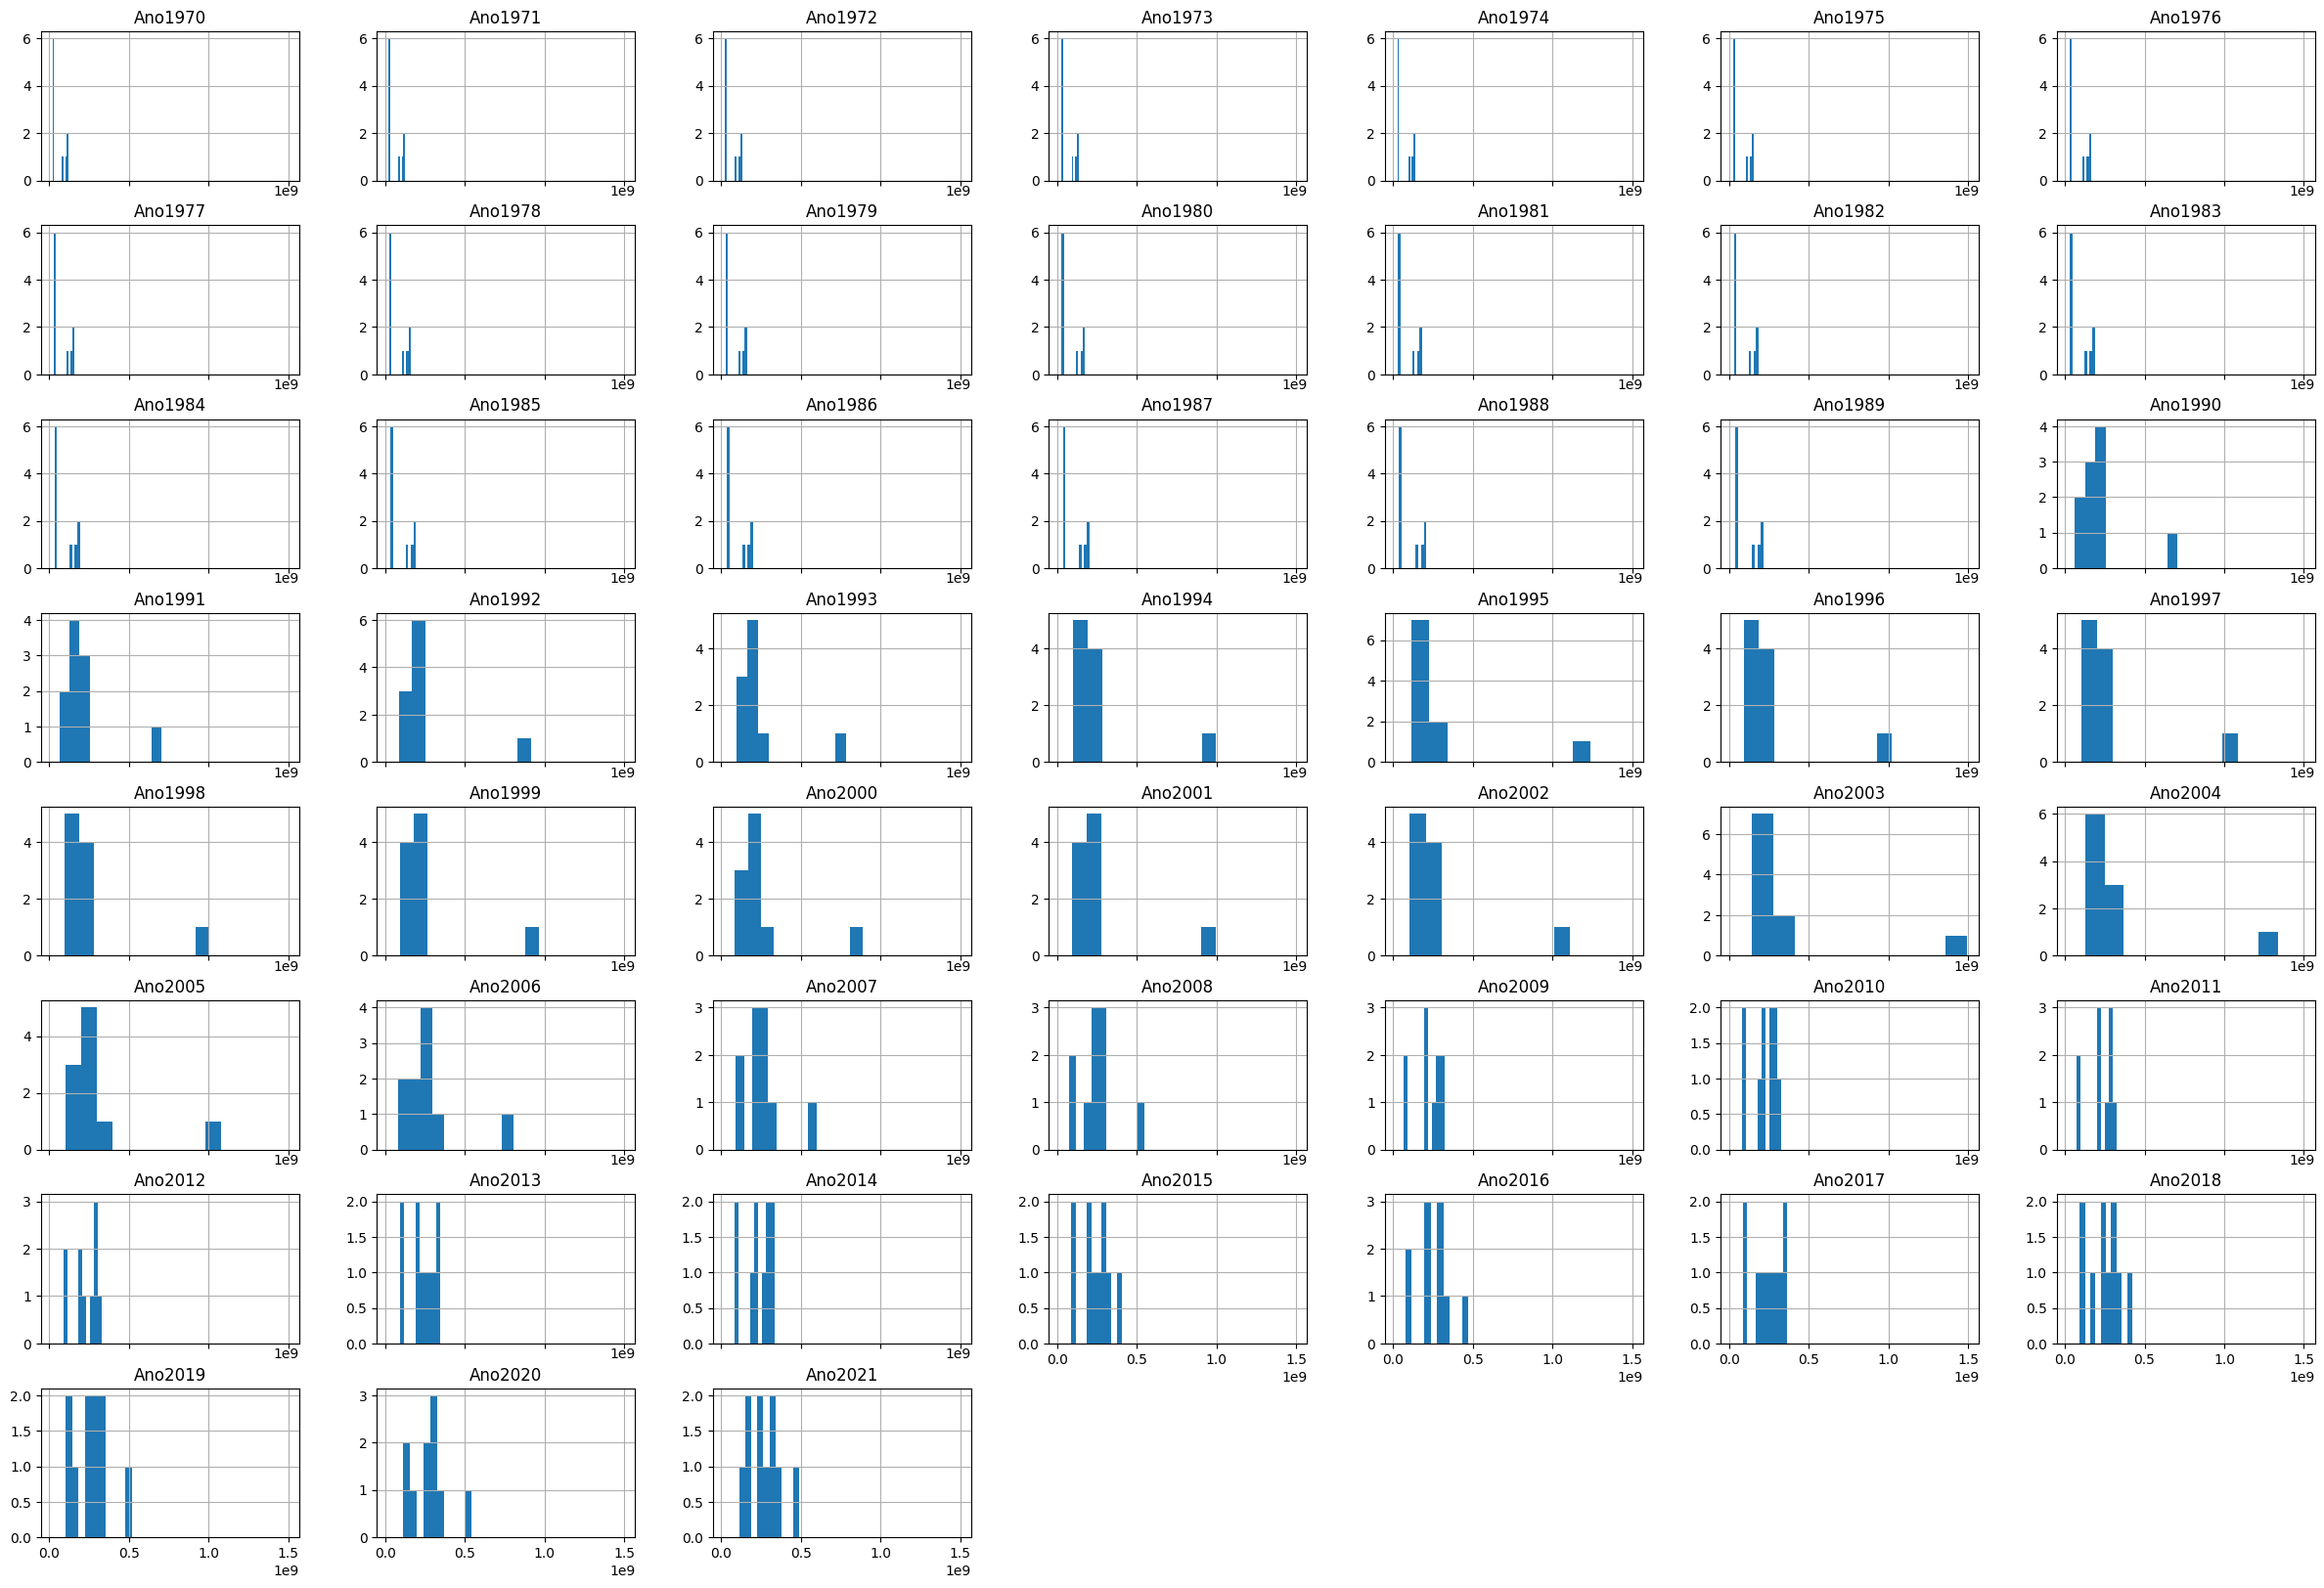

In [17]:
# Histograma

top_10_por_coluna.hist(sharex = True, figsize = (30,20))

plt.show()

Observa-se um outlier a partir de 1990 que se aproxima do conjunto de dados representando as maiores 10 emissões da série histórica e como os maiores valores encontrados para emissões no dataset giram em torno de, principalmente, 0,1e+09 e 0,4e+09 (ou 10 e 40 bilhões) de ton de GEEs, com foco crescendo de 10 a 40 de acordo com o passar do tempo.

##### Cd08 - Density plot 2 - Top 10

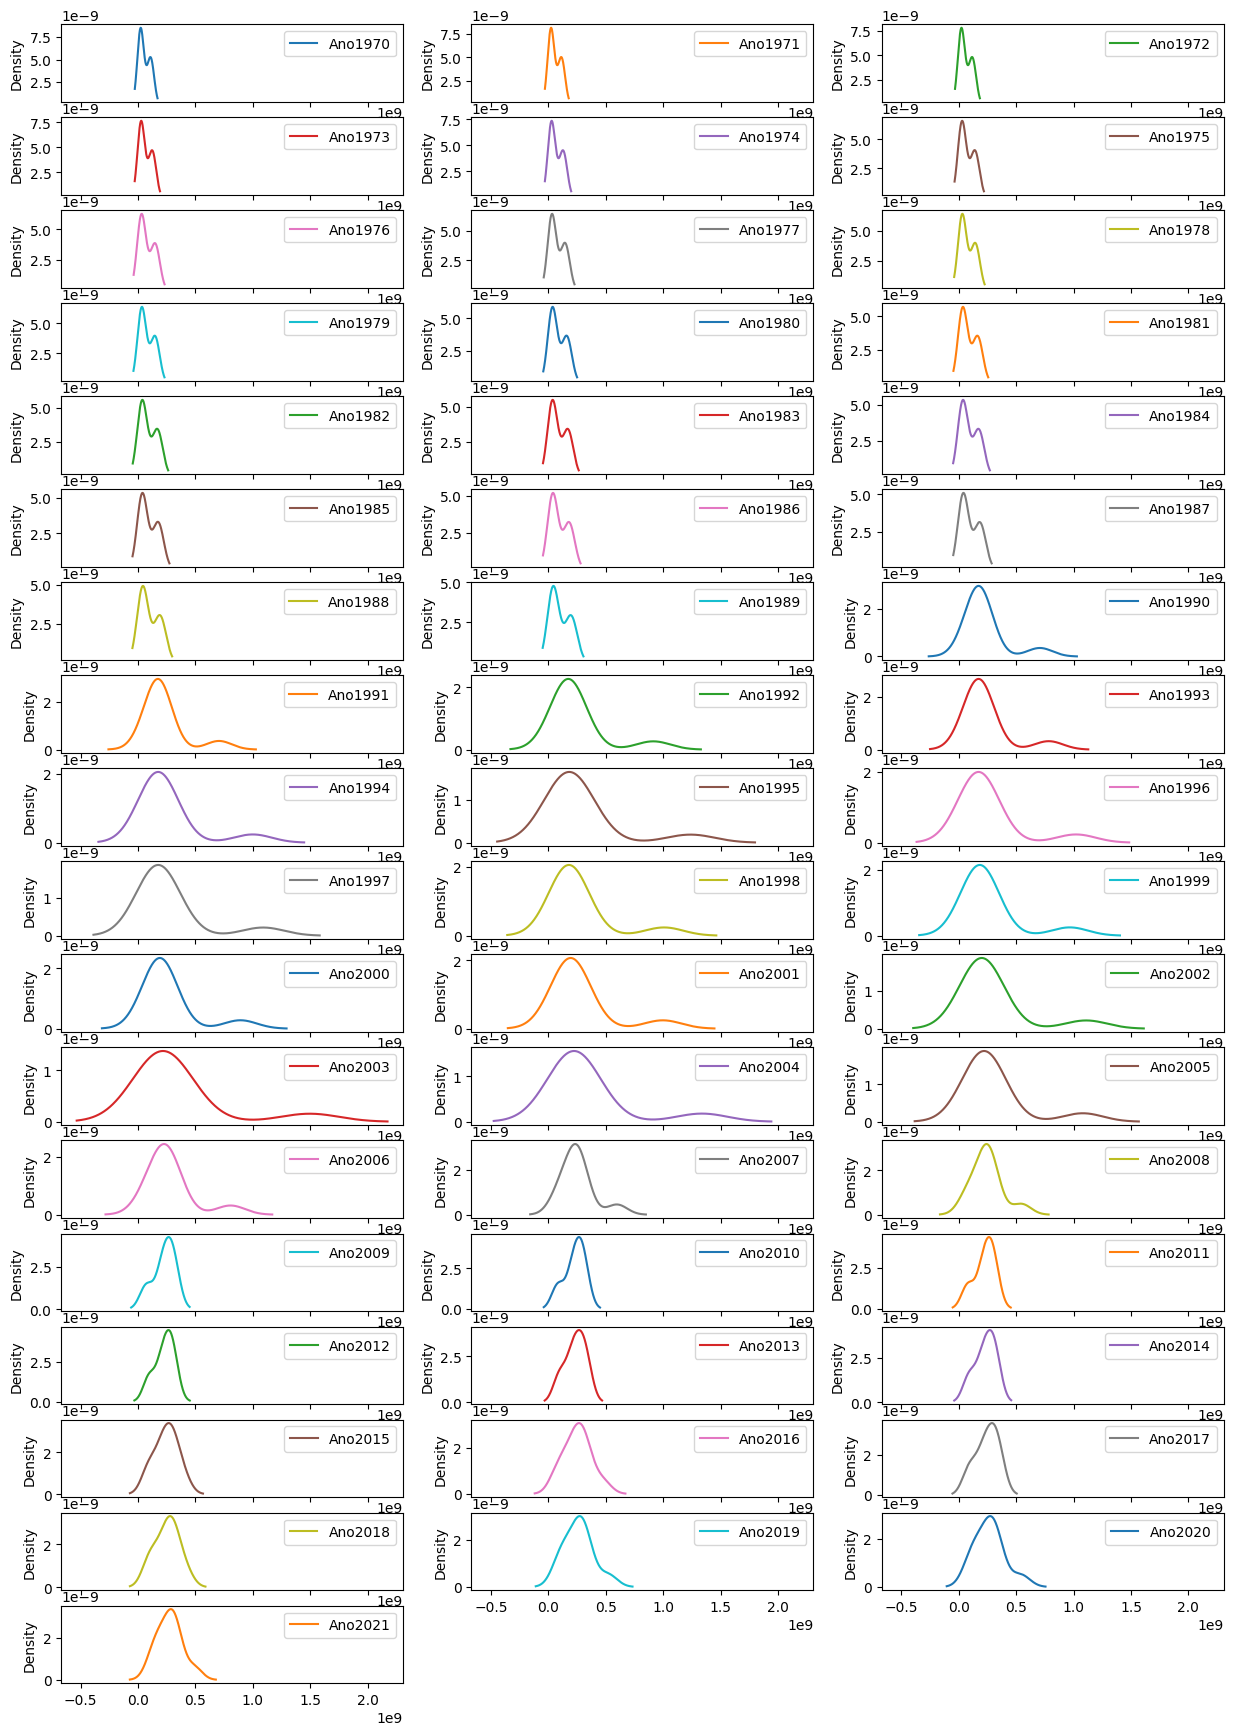

In [18]:
# DENSITY PLOT 2 - registros dos 10 maiores dados em cada ano

top_10_por_coluna.plot(kind = 'density', subplots = True, layout = (25,3), sharex = True, figsize = (15,30))
plt.show()

Verifica-se uma distribuição semelhante ao Density plot 1, com uma maior especificação da variância dos dados a partir de 1990.


##### Cd09 - Boxplot top 10

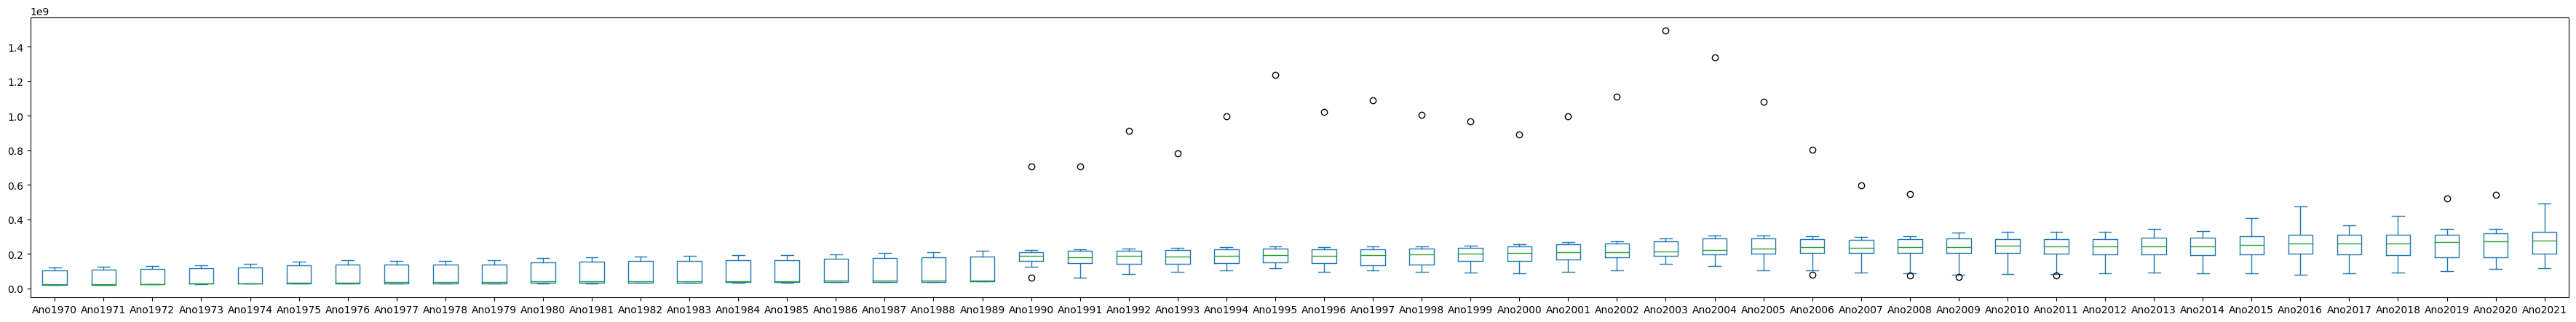

In [19]:
# Boxplot
top_10_por_coluna.plot(kind = 'box', subplots = False, layout = (10,5), sharex = False, sharey = True, figsize = (45,5))
plt.show()

A variação entre os valores dos diferentes períodos/Etapas observadas dentre os dados disponíveis é aparente para os 10 registros de maiores valores dentro do dataset.

### Visualizações Multimodais

##### Cd10 - Heatmaps

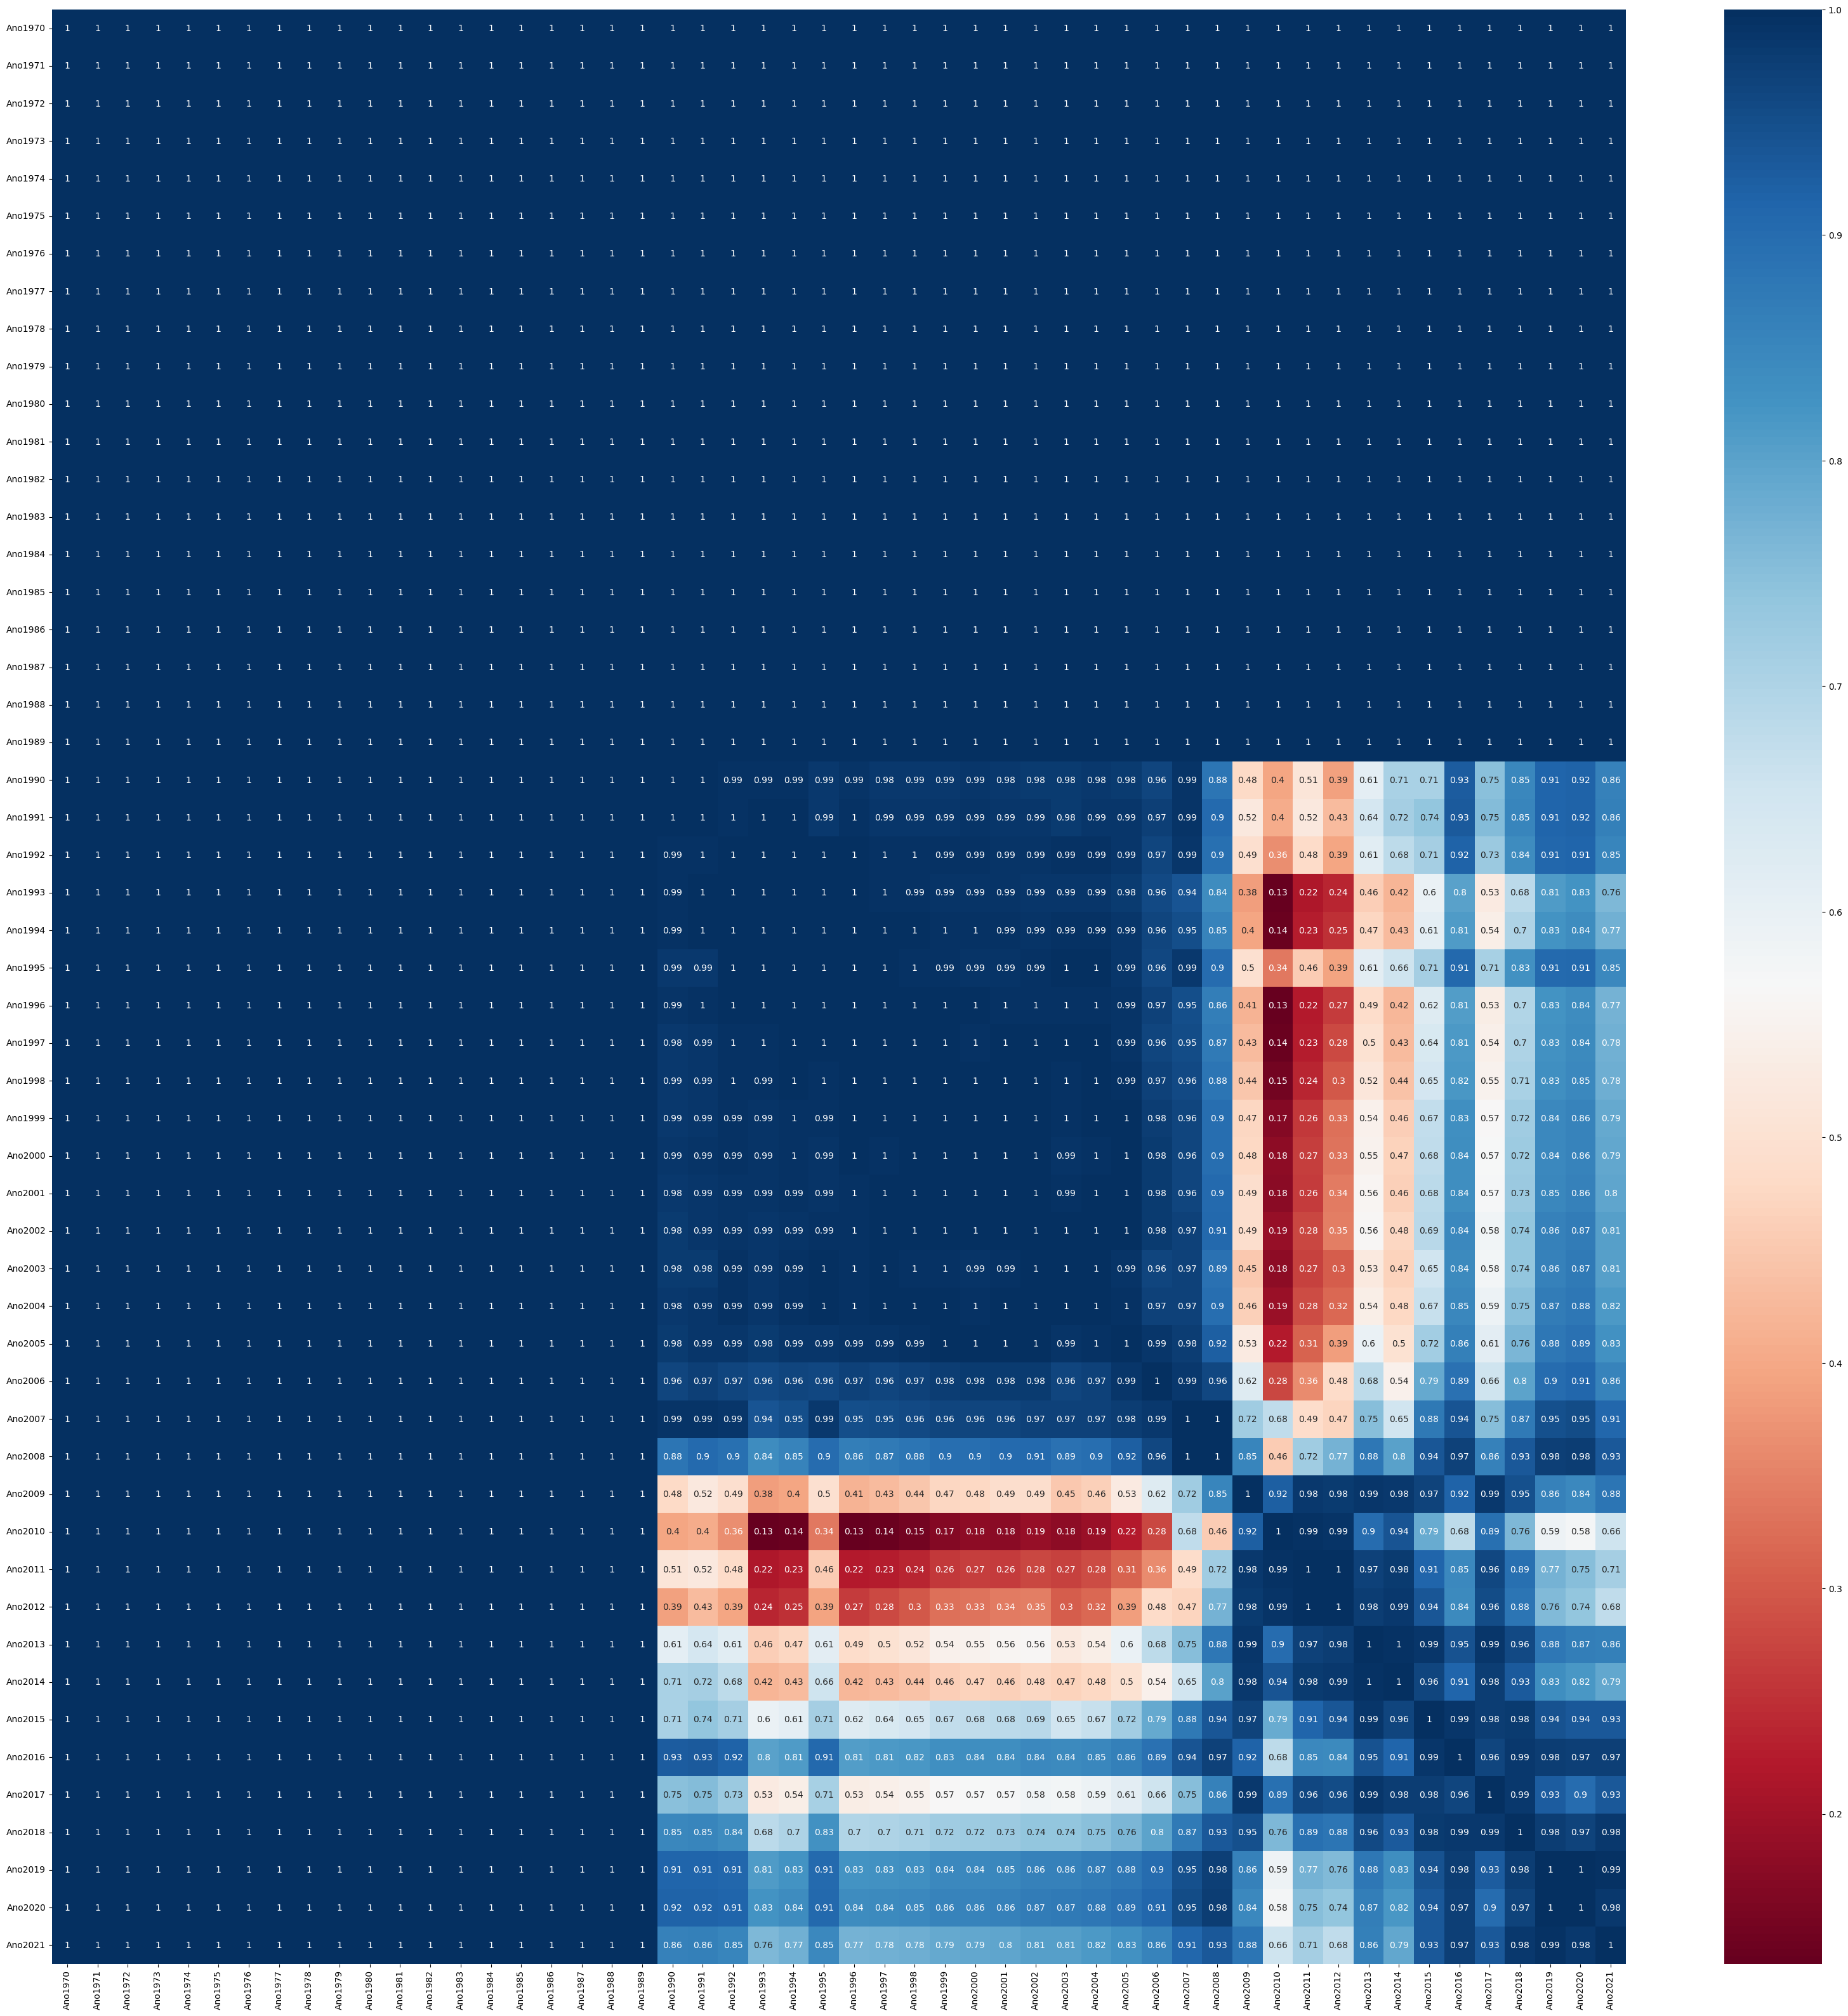

In [20]:
# Heatmap - 1
# Ajusta o tamanho da figura
plt.figure(figsize=(40, 40))

# Cria o mapa de calor para os 10 maiores valores de emissões de GEEs para cada ano
sns.heatmap(top_10_por_coluna.corr(), annot=True, cmap='RdBu')

# Exibe o gráfico
plt.show()

Observa-se claramente a correlação forte entre os maiores 10 dados das Etapas I e III, com dados (com maior variância) apresentam menor correlação, por serem maiores, como esperado e observado anterioremente. Análises futuras devem dividir os três períodos para otimização dos modelos.

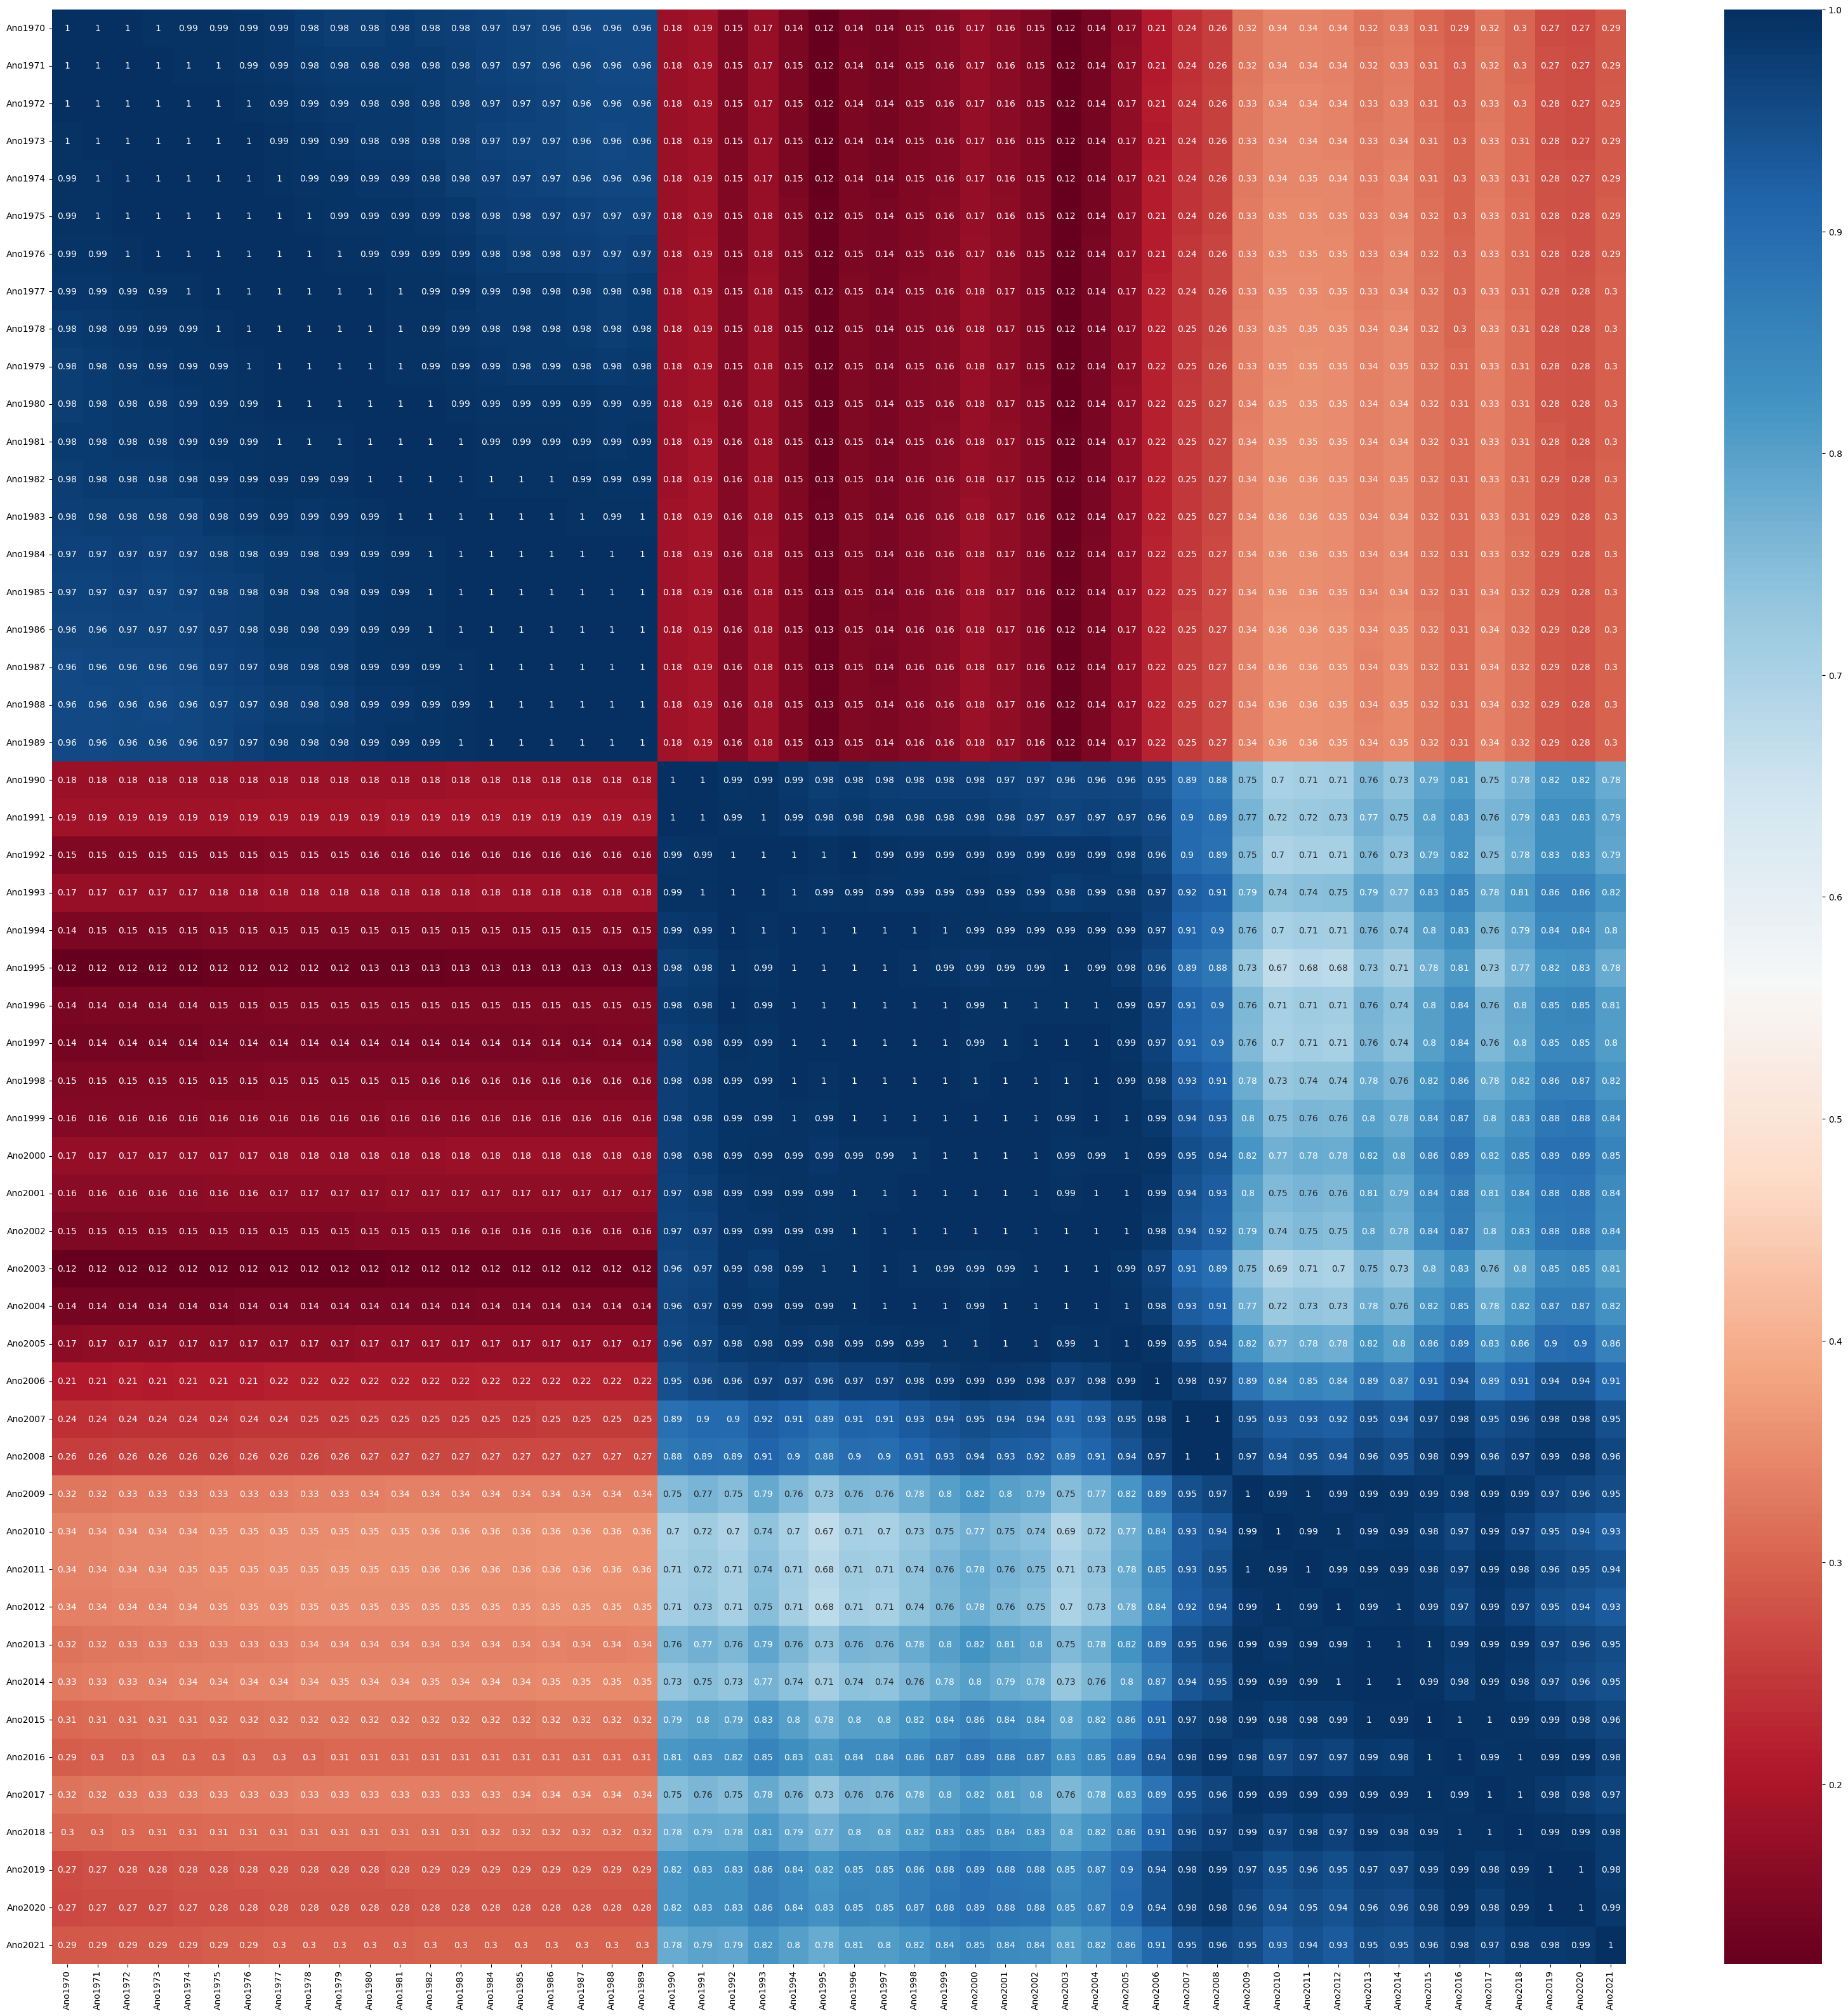

In [21]:
# Heatmap - 2

# Ajusta o tamanho da figura
plt.figure(figsize=(40, 40))

# Cria o mapa de calor para todos os valores do dataset
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu')

# Exibe o gráfico
plt.show()

Os heatmaps apresentam o previamente observado, a ocorrência de três Etapas ou fases dos dados, observados entre os 10 maiores valores de cada ano e para o total dos valores apresentados no dataset.

Na no Heatmap 2 confirma-se a quebra na evolução do padrão correlacional observado entre 1989 e 1990, apresentando uma correlação baixa com entre a Etapa I e as Etapas II e III e com a correlação entre as etapas II e III sendo forte (mantendo valor superior a 0.66 a todo momento). Reforça-se, aqui, a justificativa da adoção de três etapas para avaliação de dados em razão da correlação apresentando níveis mais fortes quando iterados entre dados de cada Etapa e mais fracas quando iterados com dados de outras Etapas.

##### Cd11 - Pair plot top 10 Etapa 2 dos dados

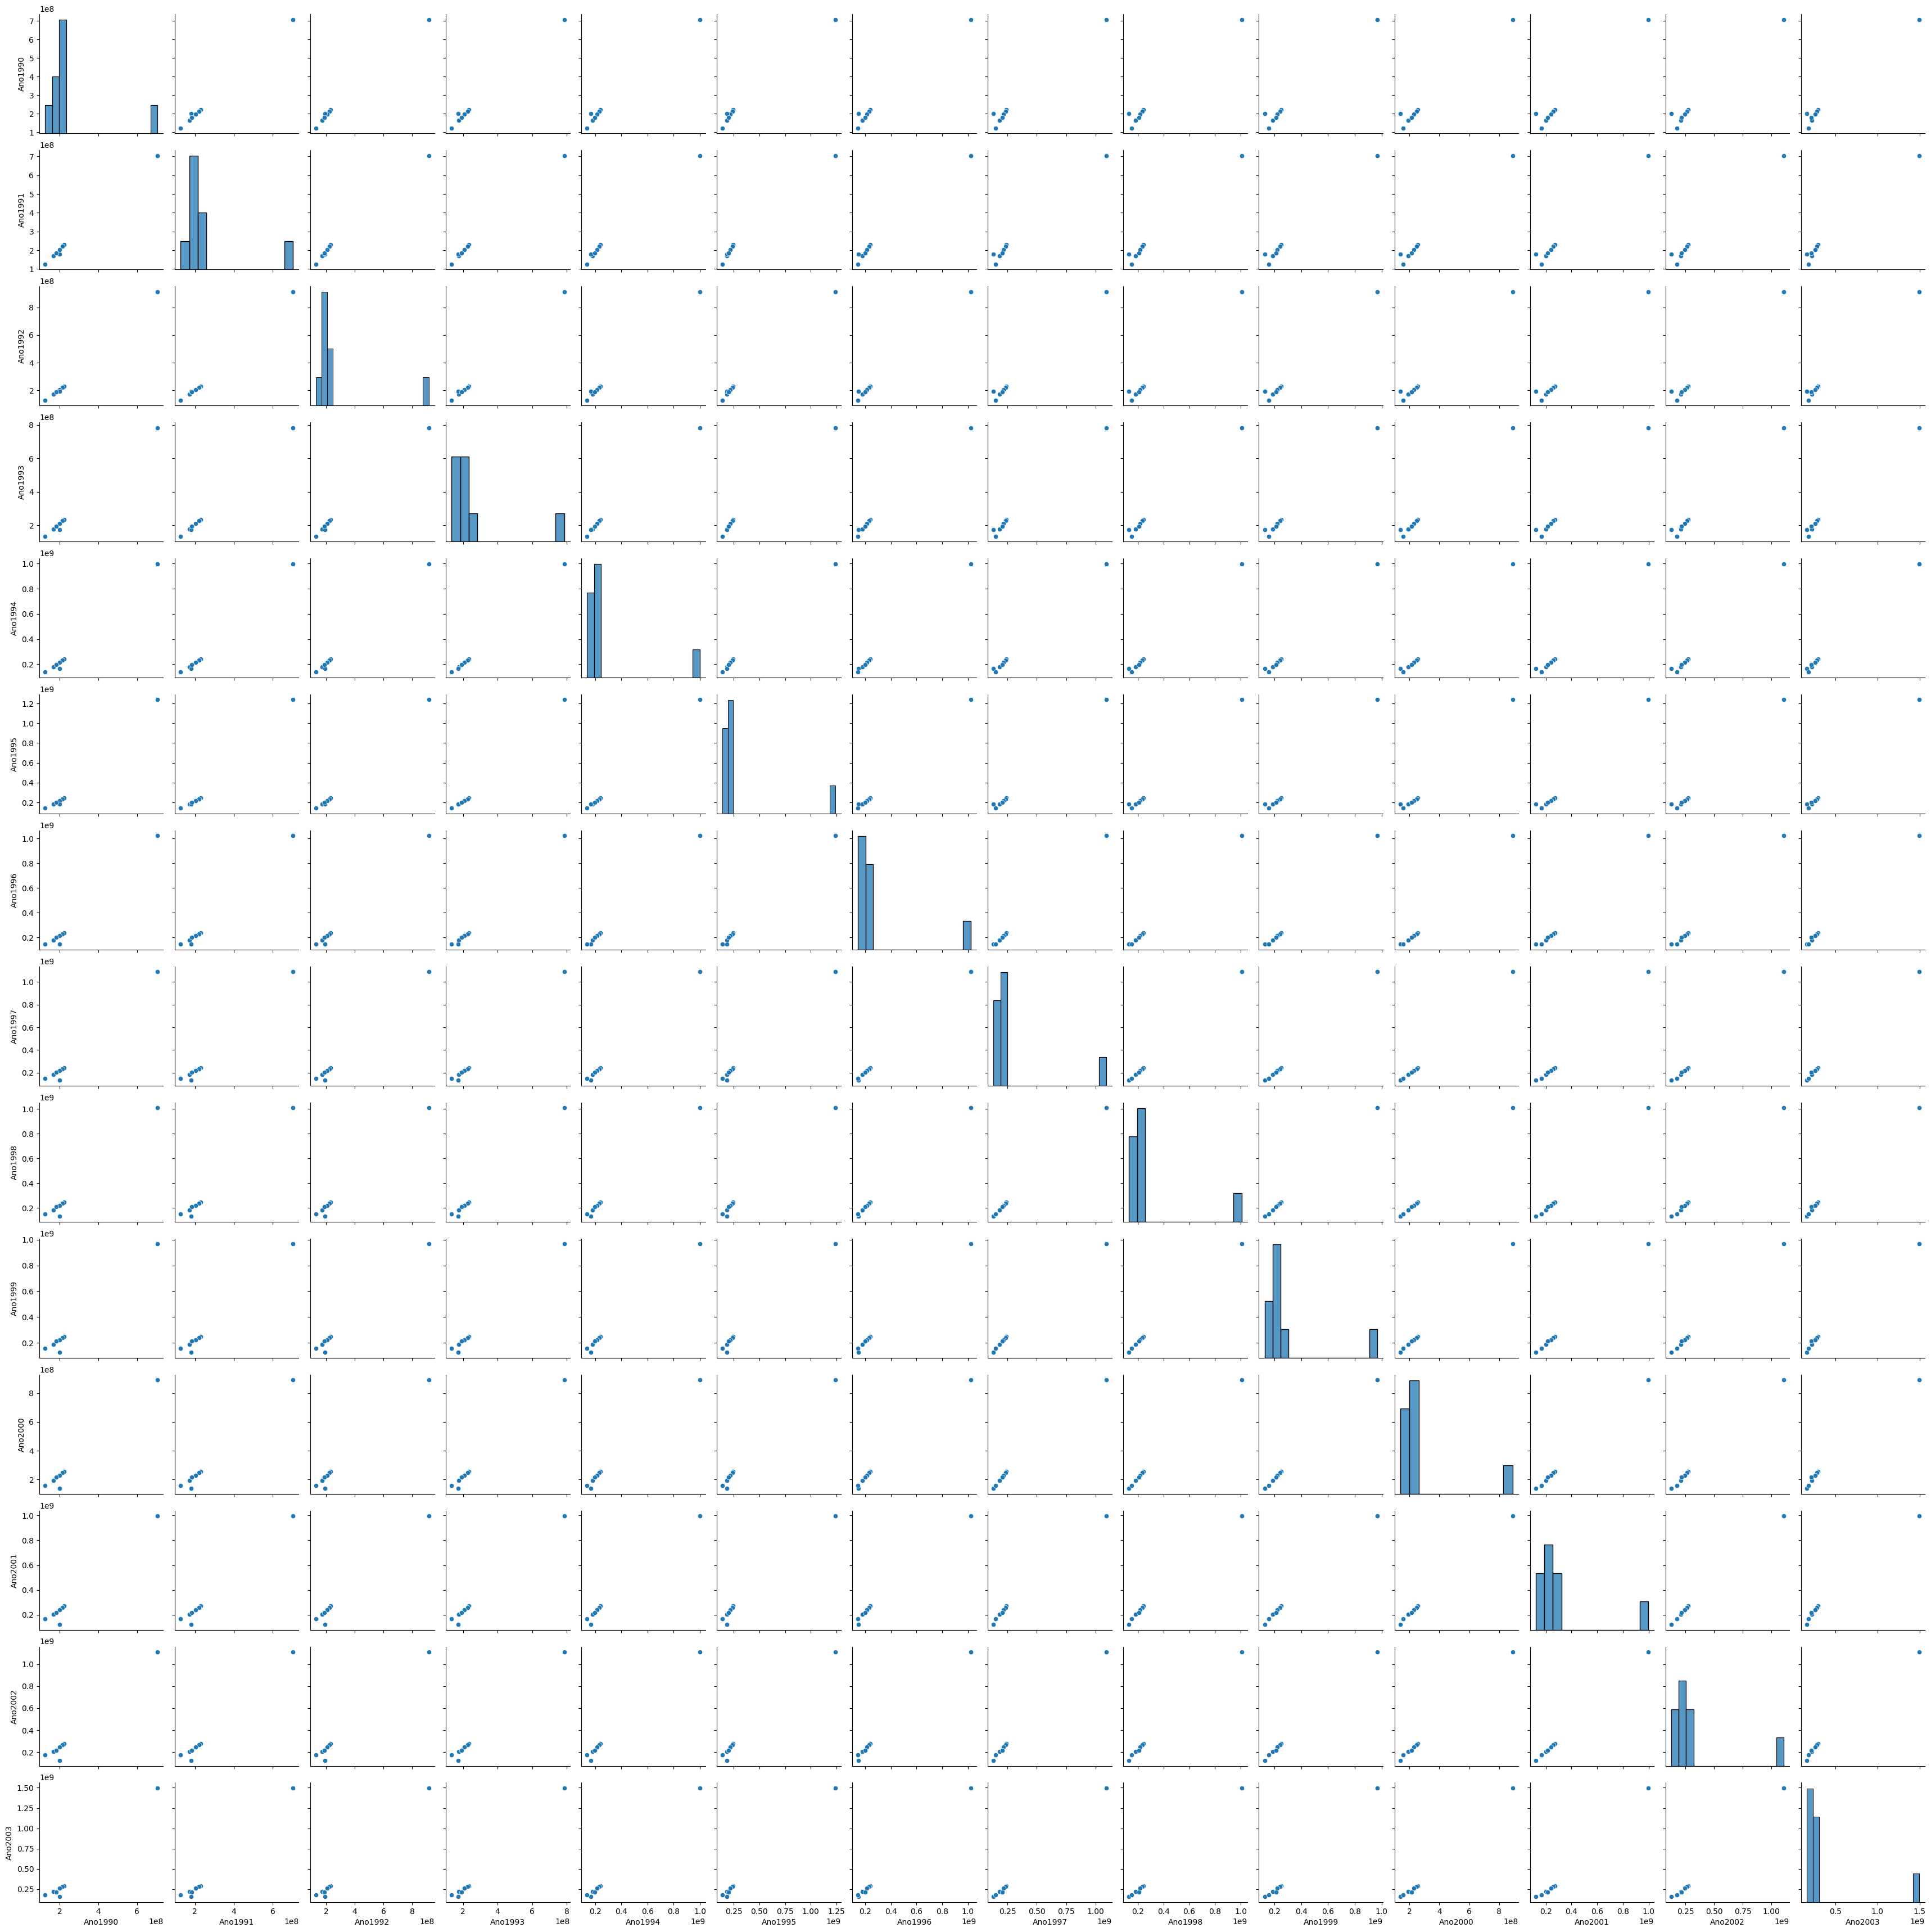

In [22]:
# Convert column names to strings if they are integers
top_10_por_coluna.columns = top_10_por_coluna.columns.astype(str)

# Create a DataFrame subset with only non-null values for 'Ano2002'
subset_df = top_10_por_coluna.iloc[:,top_10_por_coluna.columns.get_loc('Ano1990'):top_10_por_coluna.columns.get_loc('Ano2003') + 1].dropna()

# Create a pair plot for the subset
sns.pairplot(subset_df[['Ano1990', 'Ano1991', 'Ano1992', 'Ano1993', 'Ano1994', 'Ano1995', 'Ano1996', 'Ano1997', 'Ano1998', 'Ano1999', 'Ano2000', 'Ano2001', 'Ano2002', 'Ano2003']])

# Show the plot
plt.show()

Observa-se claramente a baixa representatividade dos dados *outliers*. Hipotetiza-se que se trata de um registro anual distoante dos demais, a ser explorado.

In [23]:
# Imprimi-se o subset para verificação do dado discrepante

print(subset_df)

           Ano1990       Ano1991       Ano1992       Ano1993       Ano1994  \
505   2.216931e+08  2.288294e+08  2.314837e+08  2.345783e+08  2.399852e+08   
506   2.137755e+08  2.206569e+08  2.232164e+08  2.262005e+08  2.314143e+08   
504   1.979403e+08  2.043120e+08  2.066818e+08  2.094449e+08  2.142725e+08   
503   1.662698e+08  1.716221e+08  1.736127e+08  1.759337e+08  1.799889e+08   
8209  7.071040e+08  7.048320e+08  9.134442e+08  7.840929e+08  9.982027e+08   
8866  2.004821e+08  1.800550e+08  1.923735e+08  1.719722e+08  1.674577e+08   
1273  1.806170e+08  1.836976e+08  1.883529e+08  1.920666e+08  1.951062e+08   
1300  1.237616e+08  1.263879e+08  1.304918e+08  1.340726e+08  1.372534e+08   

      ...       Ano1999       Ano2000       Ano2001       Ano2002  \
505   ...  2.481150e+08  2.563657e+08  2.690606e+08  2.744420e+08   
506   ...  2.392538e+08  2.472098e+08  2.594513e+08  2.646405e+08   
504   ...  2.215313e+08  2.288979e+08  2.402327e+08  2.450375e+08   
503   ...  1.860863e+

Identifica-se que os registros discrepantes são provenientes da linha 8209, por vezes sendo 10x maior que outro regeistro no mesmo ano.

In [24]:
# Define o máximo de linhas e colunas apresentadas em Print para 70

pd.set_option('display.max_rows', 70)
pd.set_option('display.max_columns', 70)

# Imprime a tupla de registros outliers
print(dataset.iloc[8209])


# Re-define o máximo de linhas e colunas apresentadas em Print para 10

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

N1                       Mudanca_de_Uso_da_Terra_e_Floresta
N2                               Alteracoes_de_Uso_da_Terra
N3                                                 Amazonia
N4                                   fora_de_area_Protegida
N5                                             Desmatamento
N6                      Floresta_primaria__Uso_agropecuario
EmissaoReducaoBunker                                Emissao
Gas                                                   CO2_t
Território                                               BR
AtividadeEconomica                                  AGROPEC
Produto                                                 NaN
Ano1970                                                 0.0
Ano1971                                                 0.0
Ano1972                                                 0.0
Ano1973                                                 0.0
Ano1974                                                 0.0
Ano1975                                 

O *outlier* é identificado pela linha 8209 nos anos como emissões provenientes de Mudança de Uso da Terra e Florestas por desmatamento, fora de área protegida na região Amazônica.

## Pré-processamento de dados

### Tratamento de *missings* e limpeza

##### Cd12 - Dados null dentre os registros do top 10 e em todo dataset

In [25]:
# Imprime a quantidade de valores null dentro de cada linha da matriz com os 10 maiores valore de emissões para cada ano

top_10_por_coluna.isnull().sum()

Ano1970    22
Ano1971    22
Ano1972    22
Ano1973    22
Ano1974    22
           ..
Ano2017    22
Ano2018    22
Ano2019    22
Ano2020    22
Ano2021    22
Length: 52, dtype: int64

<Axes: >

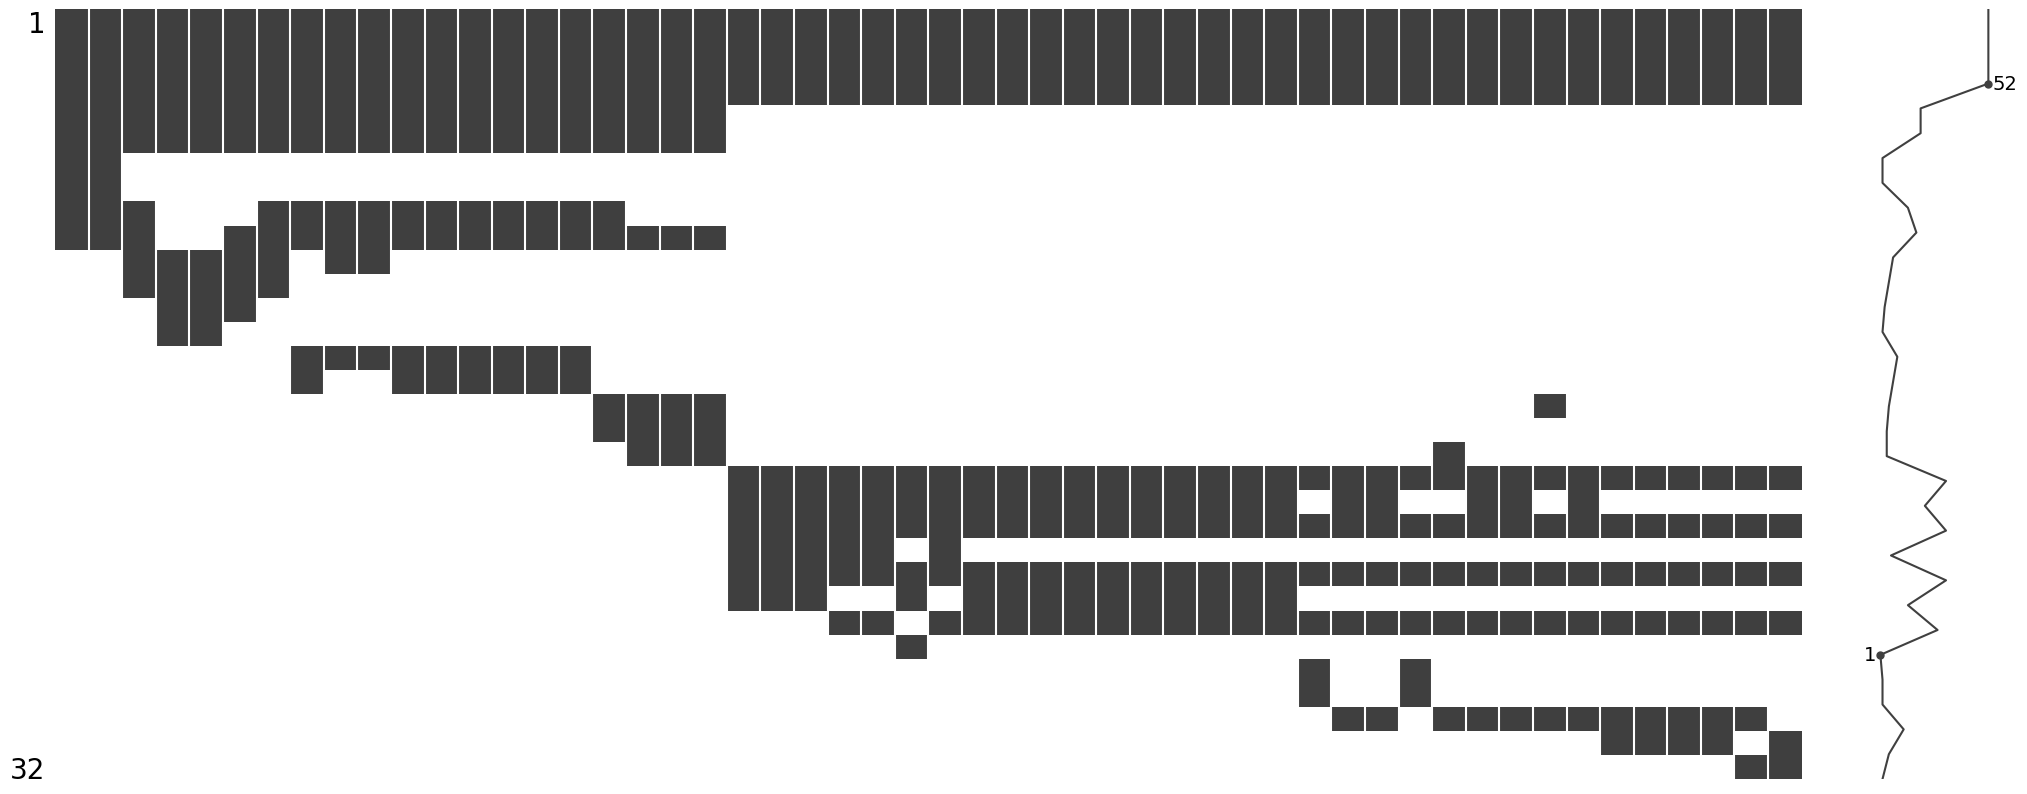

In [26]:
# ADICIONAR EXPLICAÇÃO DO CÓDIGO

col = list(top_10_por_coluna.columns)
atributos = top_10_por_coluna[col[0:53]]
atributos.replace(0, np.nan, inplace=True)
ms.matrix(atributos)

A imagem apresenta a distribuição de dados no dataset, onde os espaços em branco representam registros *null*.

In [27]:
print(atributos.info)

<bound method DataFrame.info of             Ano1970       Ano1971       Ano1972       Ano1973       Ano1974  \
505    1.202795e+08  1.255897e+08  1.309034e+08  1.362156e+08  1.416780e+08   
506    1.159838e+08  1.211044e+08  1.262282e+08  1.313507e+08  1.366180e+08   
504    1.073924e+08  1.121337e+08  1.168780e+08  1.216211e+08  1.264982e+08   
503    9.020964e+07  9.419229e+07  9.817751e+07  1.021617e+08  1.062585e+08   
514    2.391833e+07  2.500407e+07  2.608649e+07  2.716918e+07  2.823962e+07   
...             ...           ...           ...           ...           ...   
11226           NaN           NaN           NaN           NaN           NaN   
11227           NaN           NaN           NaN           NaN           NaN   
10761           NaN           NaN           NaN           NaN           NaN   
1291            NaN           NaN           NaN           NaN           NaN   
8398            NaN           NaN           NaN           NaN           NaN   

       ...       An

##### Cd13 - Substituição de *null*

A substituição dos valores *null* foi realizada por valores '0' tendo em vista seu não impacto no somatório final de emissões do ano.

<Axes: >

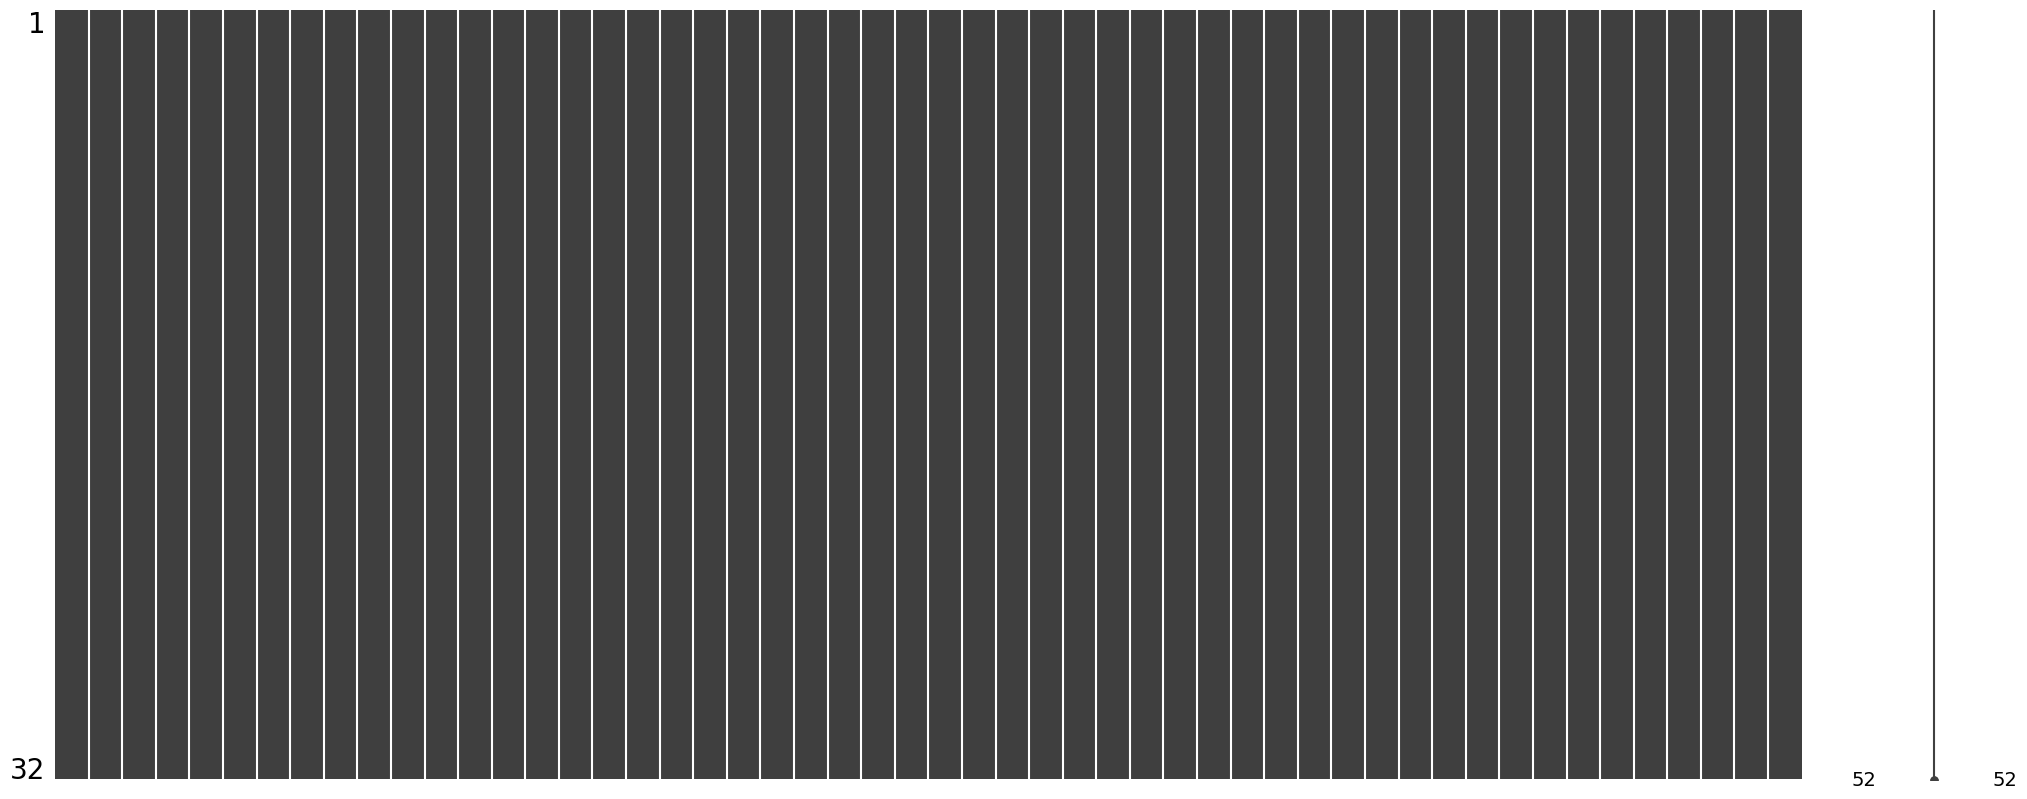

In [28]:
# Lista as colunas com registros null
colNull = atributos.columns[0:]

# Preenche cada registro null com valor 0
for column in colNull:
    atributos[column].fillna(0, inplace=True)

# Imprime a matrix de dados com espaços em branco representando null e linhas cinzas representando dados com algum valor

ms.matrix(atributos)

Verifica-se a substituição de dados para preenchimentos dos valores *null* do dataset conforme explicação nos comentários do código acima.


##### Cd14 - Definição dataset sem *null*

In [29]:
# Colunas a serem mantidas no novo DataFrame
colunas_a_manter = ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'EmissaoReducaoBunker', 'Produto', 'Território', 'AtividadeEconomica']

# Cria um novo DataFrame com as colunas especificadas
datasetSemMissings = dataset[colunas_a_manter].copy()

# Adiciona as colunas originais ao novo DataFrame
for coluna in dataset.columns:
    if coluna not in datasetSemMissings.columns:
        datasetSemMissings[coluna] = dataset[coluna]

# Exibe as primeiras linhas do novo DataFrame
print(datasetSemMissings.head())

                      N1                 N2                               N3  \
0  Processos_Industriais  Industria_Quimica               Producao_de_Amonia   
1  Processos_Industriais  Industria_Quimica  Producao_de_Carbureto_de_Calcio   
2  Processos_Industriais  Industria_Quimica              Producao_de_Metanol   
3  Processos_Industriais  Industria_Quimica                Producao_de_Eteno   
4  Processos_Industriais  Industria_Quimica    Producao_de_Cloreto_de_Vinila   

    N4   N5  ...       Ano2017       Ano2018       Ano2019       Ano2020  \
0  NaN  NaN  ...  1.985664e+06  1.985664e+06  1.985664e+06  1.985664e+06   
1  NaN  NaN  ...  4.200000e+04  4.200000e+04  4.200000e+04  4.200000e+04   
2  NaN  NaN  ...  2.142146e+04  2.142146e+04  2.142146e+04  2.142146e+04   
3  NaN  NaN  ...  5.633925e+03  5.633925e+03  5.633925e+03  5.633925e+03   
4  NaN  NaN  ...  2.058630e+05  2.058630e+05  2.058630e+05  2.058630e+05   

        Ano2021  
0  1.985664e+06  
1  4.200000e+04  
2  2.142

Na visualização acima e nas disponíveis abaixo pode-se observar a solução dos Objetivos Principais.

##### **Cd15 - Visualização de valores e participações (Objetivo principal)**

In [30]:
# Itera sobre as colunas desejadas
for col in ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'EmissaoReducaoBunker', 'Gas', 'Território', 'AtividadeEconomica']:
    # Calcula a contagem de ocorrências
    contagem_ocorrencias = datasetSemMissings[col].value_counts()

    # Calcula a participação na soma total dos valores
    participacao = datasetSemMissings.groupby(col)[colunas[11:]].sum().sum(axis=1) / datasetSemMissings[colunas[11:]].sum().sum()

    # Imprime os resultados
    print(f"Atributo: {col}")
    print("Contagem e participação na quantidade total de emissões:")
    for index, value in contagem_ocorrencias.items():
        print(f"{index}: {value} / {participacao[index] * 100:.3f}%")
    print()

    # Imprime o total de contagem e participação
    print(f"Total {col}: {contagem_ocorrencias.sum()} / {participacao.sum() * 100:.3f}%")
    print()
    print()

Atributo: N1
Contagem e participação na quantidade total de emissões:
Energia: 6715 / 13.409%
Mudanca_de_Uso_da_Terra_e_Floresta: 3092 / 54.531%
Agropecuaria: 874 / 27.887%
Processos_Industriais: 453 / 3.062%
Residuos_: 149 / 1.111%

Total N1: 11283 / 100.000%


Atributo: N2
Contagem e participação na quantidade total de emissões:
Emissoes_pela_Queima_de_Combustiveis: 6548 / 12.876%
Alteracoes_de_Uso_da_Terra: 1989 / 36.103%
Solos_Manejados: 630 / 20.063%
Remocao_por_Mudanca_de_Uso_da_Terra: 441 / 0.134%
Remocao_por_Vegetacao_Secundaria: 414 / 5.524%
Producao_de_Metais: 210 / 1.682%
Emissoes_Fugitivas: 167 / 0.533%
Industria_Quimica: 144 / 0.249%
Manejo_de_Dejetos_Animais: 130 / 0.497%
Remocao_em_areas_Protegidas: 108 / 8.191%
Fermentacao_EntÃ©rica: 81 / 7.037%
Residuos_Solidos: 76 / 0.597%
Efluentes_Liquidos_: 73 / 0.514%
Queimadas_Nao_Associadas_a_Desmatamento: 66 / 2.813%
Produtos_Minerais: 63 / 0.932%
Residuos_Florestais: 60 / 1.762%
Queima_de_Residuos_Agricolas: 24 / 0.057%
Carbon

In [31]:
# Especifica o filtro em 'N1'
AtivEcon = "Mudanca_de_Uso_da_Terra_e_Floresta"

# Calcula a soma total de emissões para todos os anos e para todos os valores
soma_total_todos_anos = datasetSemMissings[colunas[11:]].sum().sum()

# Inicializa a variável de soma
valor_totalAtivEcon = 0

# Itera ao longo dos anos e calcula a soma para cada ano
print(f"Para '{AtivEcon}', valor somado da emissão de cada ano e respectiva representatividade no total de emissões estimadas entre 1970 e 2021:")
for ano in range(1970, 2022):
    soma_ano = datasetSemMissings.loc[datasetSemMissings['N1'] == AtivEcon, f'Ano{ano}'].sum()

    # Calcula a porcentagem de participação para o ano
    porcentagem_participacao = (soma_ano / soma_total_todos_anos) * 100
    valor_totalAtivEcon += soma_ano

    print(f"'{ano}' - {soma_ano} / {porcentagem_participacao:.2f}%")

# Calcula a porcentagem de participação total da variável 'AtivEcon'
porcentagem_total_participacao = (valor_totalAtivEcon / soma_total_todos_anos) * 100

# Imprime a soma total para 'AtivEcon' e a porcentagem da participação total
print(f"\nSoma total para '{AtivEcon}': {valor_totalAtivEcon}.")
print(f"Participação de emissões de '{AtivEcon}' no total: {porcentagem_total_participacao:.2f}%")

Para 'Mudanca_de_Uso_da_Terra_e_Floresta', valor somado da emissão de cada ano e respectiva representatividade no total de emissões estimadas entre 1970 e 2021:
'1970' - 0.0 / 0.00%
'1971' - 0.0 / 0.00%
'1972' - 0.0 / 0.00%
'1973' - 0.0 / 0.00%
'1974' - 0.0 / 0.00%
'1975' - 0.0 / 0.00%
'1976' - 0.0 / 0.00%
'1977' - 0.0 / 0.00%
'1978' - 0.0 / 0.00%
'1979' - 0.0 / 0.00%
'1980' - 0.0 / 0.00%
'1981' - 0.0 / 0.00%
'1982' - 0.0 / 0.00%
'1983' - 0.0 / 0.00%
'1984' - 0.0 / 0.00%
'1985' - 0.0 / 0.00%
'1986' - 0.0 / 0.00%
'1987' - 0.0 / 0.00%
'1988' - 0.0 / 0.00%
'1989' - 0.0 / 0.00%
'1990' - 13499341416.602367 / 1.45%
'1991' - 13606964763.359392 / 1.46%
'1992' - 15727098756.46528 / 1.69%
'1993' - 14765467733.639315 / 1.59%
'1994' - 16873767800.458477 / 1.81%
'1995' - 19503924513.847248 / 2.10%
'1996' - 17011902144.154087 / 1.83%
'1997' - 17818869146.915638 / 1.91%
'1998' - 17535241289.67723 / 1.88%
'1999' - 17388600196.8665 / 1.87%
'2000' - 16787269838.07492 / 1.80%
'2001' - 17624600025.092236 

In [32]:
# Especifica o filtro em 'N1'
AtivEcon = "Agropecuaria"

# Calcula a soma total de emissões para todos os anos e para todos os valores
soma_total_todos_anos = datasetSemMissings[colunas[11:]].sum().sum()

# Inicializa a variável de soma
valor_totalAtivEcon = 0

# Itera ao longo dos anos e calcula a soma para cada ano
print(f"Para '{AtivEcon}', valor somado da emissão de cada ano e respectiva representatividade no total de emissões estimadas entre 1970 e 2021:")
for ano in range(1970, 2022):
    soma_ano = datasetSemMissings.loc[datasetSemMissings['N1'] == AtivEcon, f'Ano{ano}'].sum()

    # Calcula a porcentagem de participação para o ano
    porcentagem_participacao = (soma_ano / soma_total_todos_anos) * 100
    valor_totalAtivEcon += soma_ano

    print(f"'{ano}' - {soma_ano} / {porcentagem_participacao:.2f}%")

# Calcula a porcentagem de participação total da variável 'AtivEcon'
porcentagem_total_participacao = (valor_totalAtivEcon / soma_total_todos_anos) * 100

# Imprime a soma total para 'AtivEcon' e a porcentagem da participação total
print(f"\nSoma total para '{AtivEcon}': {valor_totalAtivEcon}.")
print(f"Participação de emissões de '{AtivEcon}' no total: {porcentagem_total_participacao:.2f}%")

Para 'Agropecuaria', valor somado da emissão de cada ano e respectiva representatividade no total de emissões estimadas entre 1970 e 2021:
'1970' - 1091334296.4402184 / 0.12%
'1971' - 1133558245.852204 / 0.12%
'1972' - 1184687831.9226377 / 0.13%
'1973' - 1228637297.800075 / 0.13%
'1974' - 1281828817.7415147 / 0.14%
'1975' - 1401530600.9777815 / 0.15%
'1976' - 1468934392.149433 / 0.16%
'1977' - 1482879935.008575 / 0.16%
'1978' - 1475419164.6811142 / 0.16%
'1979' - 1522625583.5913057 / 0.16%
'1980' - 1644907731.8398316 / 0.18%
'1981' - 1661070680.3848324 / 0.18%
'1982' - 1684526496.8877432 / 0.18%
'1983' - 1688806508.8578548 / 0.18%
'1984' - 1752985060.118125 / 0.19%
'1985' - 1771258579.6835623 / 0.19%
'1986' - 1816191543.3496954 / 0.20%
'1987' - 1873019379.916196 / 0.20%
'1988' - 1921524641.758874 / 0.21%
'1989' - 1984463617.6282718 / 0.21%
'1990' - 5294862438.832195 / 0.57%
'1991' - 5414673606.808564 / 0.58%
'1992' - 5545995665.731298 / 0.60%
'1993' - 5605082151.588427 / 0.60%
'1994' -

Tendo listado as emissões (com dados disponíveis) para os anos 1990 a 2021 dos dois maiores grandes níveis de classificação, 'Mudanca_de_Uso_da_Terra_e_Floresta' e 'Agropecuaria', verifica-se a constante existência de registros de GEE para o segundo caso e apenas de 1990 em diante para Mudança de Uso da Terra e Floresta.
A participação no total de emissões do maior emissor, 'Mudanca_de_Uso_da_Terra_e_Floresta', se deu ao longo dos registros de apenas 31 anos (1990 a 2021), tendo sua representatividade perante todo o emitido durante o período em 54,53% da somatória de todas emissões anuais registradas e com sua representatividade variando entre 1,26% e 2,10% do total das emissões no período total.
Já a participação no total de emissões do segundo maior emissor, 'Agropecuaria', se deu ao longo dos registros de todo o período registrado, tendo sua representatividade perante todo o emitido durante o período em 27,89% de todas emissões anuais registradas e com sua representatividade variando entre 0,12% e 1% do total das emissões no período total.

##### Cd16 - Visualização de participações (Objetivo principal)

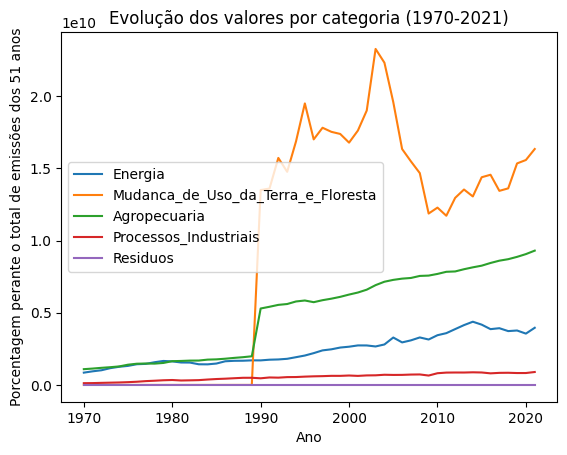

In [33]:
# Especifica as categorias desejadas
categorias = ['Energia', 'Mudanca_de_Uso_da_Terra_e_Floresta', 'Agropecuaria', 'Processos_Industriais', 'Residuos']

# Inicializa listas para armazenar dados do gráfico
anos = list(range(1970, 2022))
valores_por_categoria = {categoria: [] for categoria in categorias}

# Calcula a soma total de emissões para todos os anos e para todos os valores
soma_total_todos_anos = datasetSemMissings[colunas[11:]].sum().sum()

# Itera ao longo dos anos e calcula a soma para cada ano
for ano in anos:
    for categoria in categorias:
        soma_ano = datasetSemMissings.loc[datasetSemMissings['N1'] == categoria, f'Ano{ano}'].sum()
        valores_por_categoria[categoria].append(soma_ano)

# Cria o gráfico de barras para cada categoria
for categoria in categorias:
    plt.plot(anos, valores_por_categoria[categoria], label=categoria)

plt.title('Evolução dos valores por categoria (1970-2021)')
plt.xlabel('Ano')
plt.ylabel('Porcentagem perante o total de emissões dos 51 anos')
plt.legend()
plt.show()

Observamos no gráfico a participação da soma de emissões de GEEs por ano perante o total de emissões no período (1970-2021). A partir disso, verificamos a variação da participação do total de emissões anuais comparativamente concluindo alguns pontos:
- Registros mais antigos possuem menor participação no todo (principalmente antes de 1990);
- Em 1990 houve grande aumento na contabilização de dados de emissão de GEEs para Mudança_de_Uso_da_Terra_e_Floresta e Agropeguaria, enquanto Energia, Processos_Industriais e Resíduos não apresentam grandes variações no momento;
- A variância do total de GEEs ao longo dos anos em
Mudança_de_Uso_da_Terra_e_Floresta é superior a todas as demais categorias e o valor total de GEEs emitidos também ultrapassa muito as outras categorias;
- A baixa participação de Resíduos gera perguntas sobre a disponibilidade de dados e método de contabilização de GEEs vinculados a tal categoria.

### Cd17 - Separação em conjunto de treino e conjunto teste

In [34]:
# Lista de categorias
categorias = ['Energia', 'Mudanca_de_Uso_da_Terra_e_Floresta', 'Agropecuaria', 'Processos_Industriais', 'Residuos']

# Dicionário para armazenar as previsões de cada categoria
previsoes_por_categoria = {}

# Loop sobre cada categoria
for categoria in categorias:
    # Transforma os dados para formato adequado
    X = np.array(anos).reshape(-1, 1)  # Usamos o ano como feature
    y = np.array(valores_por_categoria[categoria])

    # Divisão dos dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Treinamento do modelo de regressão linear
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    # Previsões para os próximos 5 anos
    anos_futuros = np.array(list(range(2022, 2050))).reshape(-1, 1)
    previsoes_futuras = modelo.predict(anos_futuros)

    # Armazena as previsões no dicionário
    previsoes_por_categoria[categoria] = previsoes_futuras

    # Exibição das previsões
    print(f"\nPrevisões para a categoria '{categoria}' até 2050:")
    for ano, previsao in zip(range(2022, 2050), previsoes_futuras):
        print(f'Ano {ano}: {previsao:.2f} unidades de emissões')



Previsões para a categoria 'Energia' até 2050:
Ano 2022: 4099996459.30 unidades de emissões
Ano 2023: 4164400141.86 unidades de emissões
Ano 2024: 4228803824.43 unidades de emissões
Ano 2025: 4293207506.99 unidades de emissões
Ano 2026: 4357611189.55 unidades de emissões
Ano 2027: 4422014872.11 unidades de emissões
Ano 2028: 4486418554.67 unidades de emissões
Ano 2029: 4550822237.24 unidades de emissões
Ano 2030: 4615225919.80 unidades de emissões
Ano 2031: 4679629602.36 unidades de emissões
Ano 2032: 4744033284.92 unidades de emissões
Ano 2033: 4808436967.49 unidades de emissões
Ano 2034: 4872840650.05 unidades de emissões
Ano 2035: 4937244332.61 unidades de emissões
Ano 2036: 5001648015.17 unidades de emissões
Ano 2037: 5066051697.74 unidades de emissões
Ano 2038: 5130455380.30 unidades de emissões
Ano 2039: 5194859062.86 unidades de emissões
Ano 2040: 5259262745.42 unidades de emissões
Ano 2041: 5323666427.98 unidades de emissões
Ano 2042: 5388070110.55 unidades de emissões
Ano 204

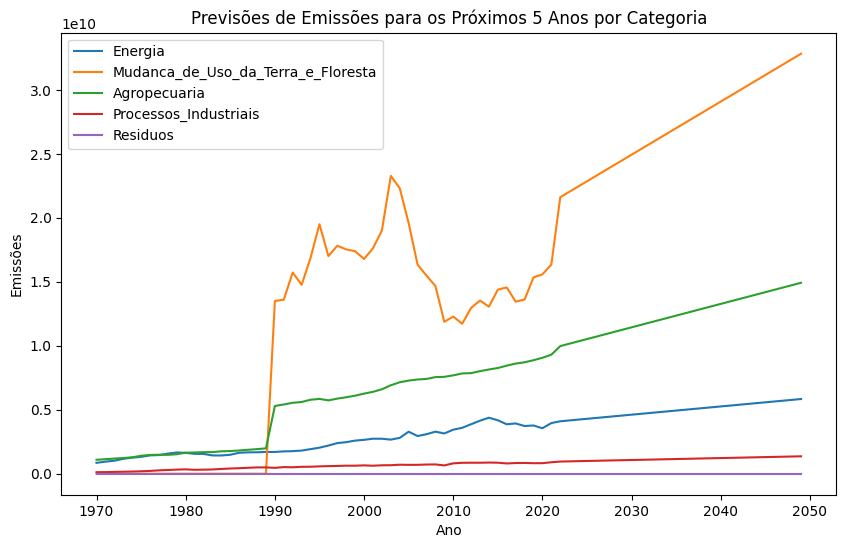

In [35]:
# Visualização gráfica das previsões
plt.figure(figsize=(10, 6))
for categoria, previsoes in previsoes_por_categoria.items():
    plt.plot(np.concatenate([anos, anos_futuros.flatten()]), np.concatenate([valores_por_categoria[categoria], previsoes]), label=categoria)

plt.title('Previsões de Emissões para os Próximos 5 Anos por Categoria')
plt.xlabel('Ano')
plt.ylabel('Emissões')
plt.legend()
plt.show()

Devido à grande variação existente entre os 3 períodos encontrados, se fará previsões para até 2050 considerando os três diferentes grupos (Etapas) previamente mencionados. A análise das previsões serão tratadas em conjunto logo antes do tópico "Conclusão".

### Cd18 - Previsão 1970-1989

In [36]:
# Reseta lista de anos, categorias e dicionário para armazenar as previsões de cada categoria
anos1 = list(range(1970, 1989))
anos2 = list(range(1990, 2008))
anos3 = list(range(2009, 2022))
categorias = ['Energia', 'Mudanca_de_Uso_da_Terra_e_Floresta', 'Agropecuaria', 'Processos_Industriais', 'Residuos']
previsoes_por_categoria = {}

# Loop sobre cada categoria
for categoria in categorias:
    # Transforma os dados para formato adequado
    X = np.array(anos1).reshape(-1, 1)  # Usamos o ano como feature
    y = np.array(valores_por_categoria[categoria][:len(anos1)])  # Usamos os valores de 1970-1989 para treinar o modelo

    # Treinamento do modelo de regressão linear
    modelo = LinearRegression()
    modelo.fit(X, y)

    # Previsões para os próximos 5 anos
    anos_futuros = np.array(list(range(2022, 2051))).reshape(-1, 1)  # Extendemos até 2050
    previsoes_futuras = modelo.predict(anos_futuros)

    # Armazena as previsões no dicionário
    previsoes_por_categoria[categoria] = previsoes_futuras

    # Exibição das previsões - 1970-2050
    print(f"\nPrevisões para a categoria '{categoria}' até 2050:")
    for ano, previsao in zip(range(2022, 2051), previsoes_futuras):
        print(f'Ano {ano}: {previsao:.2f} unidades de emissões')



Previsões para a categoria 'Energia' até 2050:
Ano 2022: 3022003215.77 unidades de emissões
Ano 2023: 3059563343.88 unidades de emissões
Ano 2024: 3097123472.00 unidades de emissões
Ano 2025: 3134683600.12 unidades de emissões
Ano 2026: 3172243728.23 unidades de emissões
Ano 2027: 3209803856.35 unidades de emissões
Ano 2028: 3247363984.46 unidades de emissões
Ano 2029: 3284924112.58 unidades de emissões
Ano 2030: 3322484240.70 unidades de emissões
Ano 2031: 3360044368.81 unidades de emissões
Ano 2032: 3397604496.93 unidades de emissões
Ano 2033: 3435164625.05 unidades de emissões
Ano 2034: 3472724753.16 unidades de emissões
Ano 2035: 3510284881.28 unidades de emissões
Ano 2036: 3547845009.40 unidades de emissões
Ano 2037: 3585405137.51 unidades de emissões
Ano 2038: 3622965265.63 unidades de emissões
Ano 2039: 3660525393.74 unidades de emissões
Ano 2040: 3698085521.86 unidades de emissões
Ano 2041: 3735645649.98 unidades de emissões
Ano 2042: 3773205778.09 unidades de emissões
Ano 204

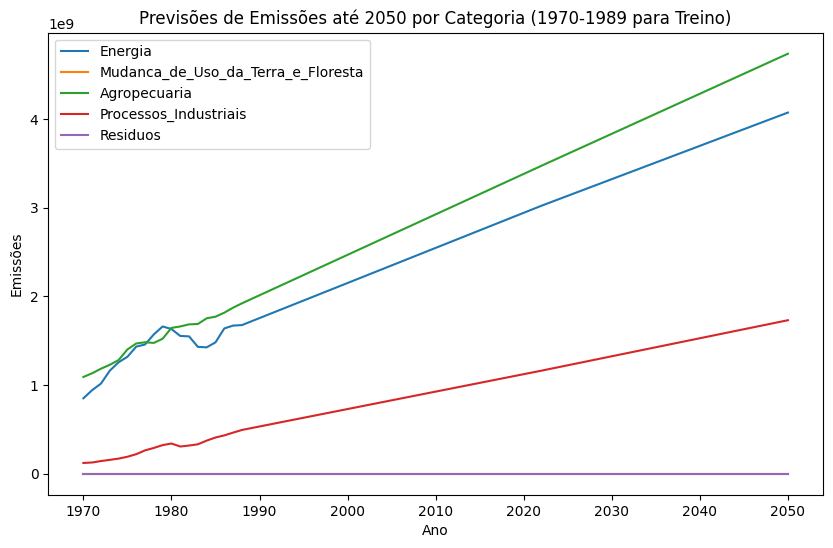

In [37]:
# Visualização gráfica das previsões - 1970-2050
plt.figure(figsize=(10, 6))
for categoria, previsoes in previsoes_por_categoria.items():
    plt.plot(np.concatenate([anos1, anos_futuros.flatten()]), np.concatenate([valores_por_categoria[categoria][:len(anos1)], previsoes]), label=categoria)

plt.title('Previsões de Emissões até 2050 por Categoria (1970-1989 para Treino)')
plt.xlabel('Ano')
plt.ylabel('Emissões')
plt.legend()
plt.show()

### Cd19 - Previsão 1990-2008

In [38]:
# Lista de colunas a serem excluídas
colunas_para_excluir = ['Ano1970', 'Ano1971', 'Ano1972', 'Ano1973', 'Ano1974', 'Ano1975', 'Ano1976', 'Ano1977', 'Ano1978', 'Ano1979',
                        'Ano1980', 'Ano1981', 'Ano1982', 'Ano1983', 'Ano1984', 'Ano1985', 'Ano1986', 'Ano1987', 'Ano1988', 'Ano1989']

# Excluir as colunas
dataset_sem_colunas = dataset.drop(columns=colunas_para_excluir)


In [39]:
# Reseta lista de anos, categorias e dicionário para armazenar as previsões de cada categoria
anos2 = list(range(1990, 2008))
anos3 = list(range(2009, 2022))
categorias = ['Energia', 'Mudanca_de_Uso_da_Terra_e_Floresta', 'Agropecuaria', 'Processos_Industriais', 'Residuos']
previsoes_por_categoria = {}

# Inicializa listas para armazenar dados do gráfico
anos = list(range(1990, 2022))
valores_por_categoria = {categoria: [] for categoria in categorias}

# Calcula a soma total de emissões para todos os anos e para todos os valores
soma_total_todos_anos = datasetSemMissings[colunas[11:]].sum().sum()

# Itera ao longo dos anos e calcula a soma para cada ano
for ano in anos:
    for categoria in categorias:
        soma_ano = datasetSemMissings.loc[datasetSemMissings['N1'] == categoria, f'Ano{ano}'].sum()
        valores_por_categoria[categoria].append(soma_ano)

# Loop sobre cada categoria
for categoria in categorias:
    # Transforma os dados para formato adequado
    X = np.array(anos2).reshape(-1, 1)  # Usamos o ano como feature
    y = np.array(valores_por_categoria[categoria][:len(anos2)])  # Usamos os valores de 1970-1989 para treinar o modelo

    # Treinamento do modelo de regressão linear
    modelo = LinearRegression()
    modelo.fit(X, y)

    # Previsões para os próximos 5 anos
    anos_futuros = np.array(list(range(2022, 2051))).reshape(-1, 1)  # Extendemos até 2050
    previsoes_futuras = modelo.predict(anos_futuros)

    # Armazena as previsões no dicionário
    previsoes_por_categoria[categoria] = previsoes_futuras

    # Exibição das previsões - 1970-2050
    print(f"\nPrevisões para a categoria '{categoria}' até 2050:")
    for ano, previsao in zip(range(2022, 2051), previsoes_futuras):
        print(f'Ano {ano}: {previsao:.2f} unidades de emissões')



Previsões para a categoria 'Energia' até 2050:
Ano 2022: 4538481272.54 unidades de emissões
Ano 2023: 4628681084.05 unidades de emissões
Ano 2024: 4718880895.56 unidades de emissões
Ano 2025: 4809080707.07 unidades de emissões
Ano 2026: 4899280518.58 unidades de emissões
Ano 2027: 4989480330.09 unidades de emissões
Ano 2028: 5079680141.61 unidades de emissões
Ano 2029: 5169879953.12 unidades de emissões
Ano 2030: 5260079764.63 unidades de emissões
Ano 2031: 5350279576.14 unidades de emissões
Ano 2032: 5440479387.65 unidades de emissões
Ano 2033: 5530679199.16 unidades de emissões
Ano 2034: 5620879010.67 unidades de emissões
Ano 2035: 5711078822.19 unidades de emissões
Ano 2036: 5801278633.70 unidades de emissões
Ano 2037: 5891478445.21 unidades de emissões
Ano 2038: 5981678256.72 unidades de emissões
Ano 2039: 6071878068.23 unidades de emissões
Ano 2040: 6162077879.74 unidades de emissões
Ano 2041: 6252277691.25 unidades de emissões
Ano 2042: 6342477502.77 unidades de emissões
Ano 204

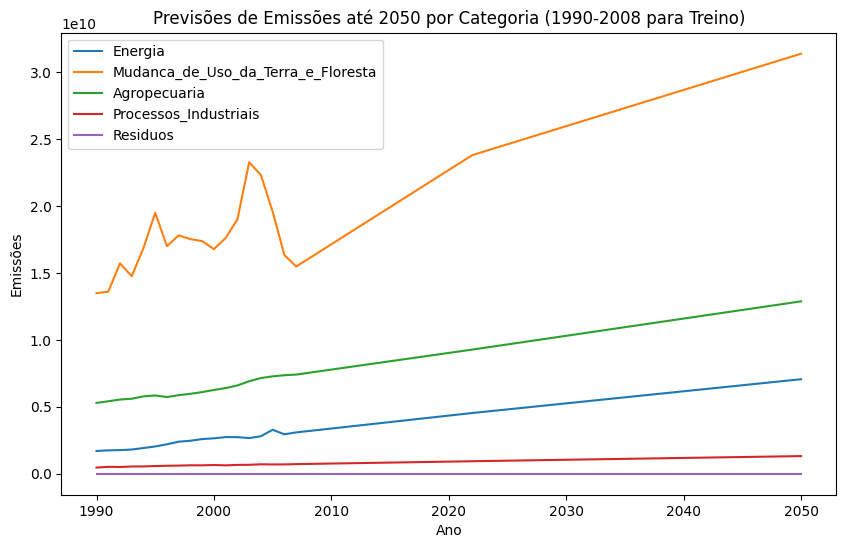

In [40]:
# Visualização gráfica das previsões - 1990-2050
plt.figure(figsize=(10, 6))
for categoria, previsoes in previsoes_por_categoria.items():
    plt.plot(np.concatenate([anos2, anos_futuros.flatten()]), np.concatenate([valores_por_categoria[categoria][:len(anos2)], previsoes]), label=categoria)

plt.title('Previsões de Emissões até 2050 por Categoria (1990-2008 para Treino)')
plt.xlabel('Ano')
plt.ylabel('Emissões')
plt.legend()
plt.show()

### Cd20 - Previsão 2009-2021

In [41]:
# Lista de colunas a serem excluídas
colunas_para_excluir = ['Ano1970', 'Ano1971', 'Ano1972', 'Ano1973', 'Ano1974', 'Ano1975', 'Ano1976', 'Ano1977', 'Ano1978', 'Ano1979',
                        'Ano1980', 'Ano1981', 'Ano1982', 'Ano1983', 'Ano1984', 'Ano1985', 'Ano1986', 'Ano1987', 'Ano1988', 'Ano1989',
                        'Ano1990', 'Ano1991', 'Ano1992', 'Ano1993', 'Ano1994', 'Ano1995', 'Ano1996', 'Ano1997', 'Ano1998', 'Ano1999',
                        'Ano2000', 'Ano2001', 'Ano2002', 'Ano2003', 'Ano2004', 'Ano2005', 'Ano2006', 'Ano2007', 'Ano2008']

# Excluir as colunas
dataset_sem_colunas = dataset.drop(columns=colunas_para_excluir)


In [42]:
# Reseta lista de anos, categorias e dicionário para armazenar as previsões de cada categoria
anos3 = list(range(2009, 2022))
categorias = ['Energia', 'Mudanca_de_Uso_da_Terra_e_Floresta', 'Agropecuaria', 'Processos_Industriais', 'Residuos']
previsoes_por_categoria = {}

# Loop sobre cada categoria
for categoria in categorias:
    # Transforma os dados para formato adequado
    X = np.array(anos3).reshape(-1, 1)  # Usamos o ano como feature
    y = np.array(valores_por_categoria[categoria][:len(anos3)])  # Usamos os valores de 1970-1989 para treinar o modelo

    # Treinamento do modelo de regressão linear
    modelo = LinearRegression()
    modelo.fit(X, y)

    # Previsões para os próximos 5 anos
    anos_futuros = np.array(list(range(2022, 2051))).reshape(-1, 1)  # Extendemos até 2050
    previsoes_futuras = modelo.predict(anos_futuros)

    # Armazena as previsões no dicionário
    previsoes_por_categoria[categoria] = previsoes_futuras

    # Exibição das previsões - 1970-2050
    print(f"\nPrevisões para a categoria '{categoria}' até 2050:")
    for ano, previsao in zip(range(2022, 2051), previsoes_futuras):
        print(f'Ano {ano}: {previsao:.2f} unidades de emissões')


Previsões para a categoria 'Energia' até 2050:
Ano 2022: 2922355372.21 unidades de emissões
Ano 2023: 3023883081.93 unidades de emissões
Ano 2024: 3125410791.64 unidades de emissões
Ano 2025: 3226938501.36 unidades de emissões
Ano 2026: 3328466211.08 unidades de emissões
Ano 2027: 3429993920.80 unidades de emissões
Ano 2028: 3531521630.52 unidades de emissões
Ano 2029: 3633049340.24 unidades de emissões
Ano 2030: 3734577049.96 unidades de emissões
Ano 2031: 3836104759.68 unidades de emissões
Ano 2032: 3937632469.40 unidades de emissões
Ano 2033: 4039160179.12 unidades de emissões
Ano 2034: 4140687888.84 unidades de emissões
Ano 2035: 4242215598.55 unidades de emissões
Ano 2036: 4343743308.27 unidades de emissões
Ano 2037: 4445271017.99 unidades de emissões
Ano 2038: 4546798727.71 unidades de emissões
Ano 2039: 4648326437.43 unidades de emissões
Ano 2040: 4749854147.15 unidades de emissões
Ano 2041: 4851381856.87 unidades de emissões
Ano 2042: 4952909566.59 unidades de emissões
Ano 204

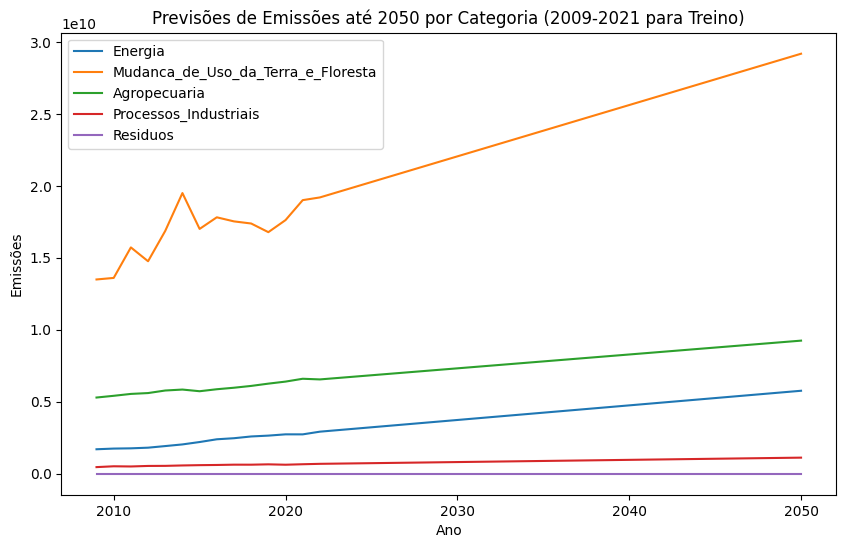

In [43]:
# Visualização gráfica das previsões - 2009-2050
plt.figure(figsize=(10, 6))
for categoria, previsoes in previsoes_por_categoria.items():
    plt.plot(np.concatenate([anos3, anos_futuros.flatten()]), np.concatenate([valores_por_categoria[categoria][:len(anos3)], previsoes]), label=categoria)

plt.title('Previsões de Emissões até 2050 por Categoria (2009-2021 para Treino)')
plt.xlabel('Ano')
plt.ylabel('Emissões')
plt.legend()
plt.show()


Os três modelos preditivos obtidos através de regressão linear evidenciaram algumas informações:
- A baixa participação registrada da classificação "Resíduos" atribui viés negativo à qualquer predição;
- Cada Etapa observada (I - 1970-1989; II - 1990-2008; III - 2009-2021) apresentou uma previsão variável de acordo com cada respectivo subconjunto de dados. As Etapas apresentaram redução nos valores preditos de emissão de carbono para cada subconjunto mais atual, sendo o subconjunto e respectivo teste da Etapa III (2009-2021) o resultado com a menor previsão de emissão de GEEs até 2050;
- A não existência de registros referente aos anos 1970-1989 para Mudanca_de_Uso_da_Terra_e_Floresta impossibilita qualquer previsão usando um subconjunto do período;
- Para Energia e Agropecuaria, que se apresentaram bastante próximas na previsão realizada com a Etapa I dos dados se distanciou na previsão da Etapa II e explicitou uma leve aproximação no caso da previsão da Etapa III.

## Conclusão

Os objetivos estabelecidos foram cumpridos:

- Apresentar as principais atividades emissoras de GEEs de acordo com a série histórica encontrada

Exibido em Cd15 - Visualização de valore e participações

- Calcular a representatividade das principais atividades perante o total de emissões de GEEs de cada ano e do período total e sua evolução

Exibido em Cd16 - Visualização de participações

Objetivos segundários

- a. Verificar a integridade e possíveis incongruências dos/nos dados



- b. (I) Identificar as principais atividades emissoras


- b. (II) sua respectiva evolução no período


- b. (III) realizar sua comparação visando observar qual atividade apresentou melhor evolução no período



## Referências

SEEG – Sistema de Estimativa de Emissões e Remoções de Gases de Efeito Estufa, Observatório do Clima, acessado em 22/11/2023.

IPCC, 2023: Sections. Em: Climate Change 2023: Synthesis Report. Contribution of Working Groups I, II and III to the Sixth
Assessment Report of the Intergovernmental Panel on Climate Change [Core Writing Team, H. Lee and J. Romero (eds.)]. IPCC,
Geneva, Switzerland, pp. 35-115, doi: 10.59327/IPCC/AR6-9789291691647

ESPÍNOLA, I. B.; RIBEIRO, W. C. (2020). Cidades e mudanças climáticas: desafios para os planos diretores municipais brasileiros. Cadernos Metrópole. São Paulo, v. 22, n. 48, pp. 365-395.

Convenção-Quadro das Nações Unidas sobre Mudanças Climáticas (em inglês, United Nations Framework Convention on Climate Change ou UNFCCC). Adoção do Acordo de Paris, 2015. Acesso em: 26/11/2023. Disponível em: https://unfccc.int/documents/9064
